In [6]:
import pandas as pd

file = 'clean_consumos.csv'

df = pd.read_csv(file)
df = df.iloc[:, 1:]

df['data_saida'] = pd.to_datetime(df['data_saida'])

mask_lisboa = (df['cst'] == 'Lisboa') & (df['instituicao'].isin([1060, 1061]))
mask_porto = (df['cst'] == 'Porto') & (df['instituicao'].isin([1061, 1062]))
mask_coimbra = (df['cst'] == 'Coimbra') & (df['instituicao'].isin([1060, 1062]))

combined_mask = (mask_lisboa | mask_porto | mask_coimbra ) & (df['data_saida'] < '2017-01-01')

dropped_records = df[combined_mask].copy()

df = df[~combined_mask]



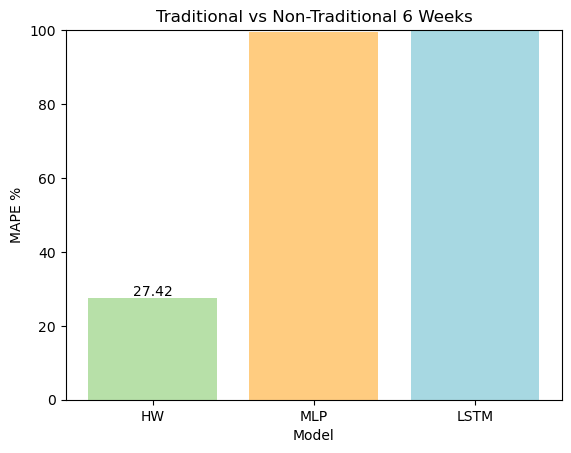

In [5]:
import matplotlib.pyplot as plt

# List of values for HW, MLP, LSTM
values = [27.42, 99.49, 99.69]

# Labels for x-axis
labels = ['HW', 'MLP', 'LSTM']

# Create figure and axis objects
fig, ax = plt.subplots()

# Plot bars with lighter colors
# Define custom light colors
light_green = '#B7E0A8'  # Light green
light_orange = '#FFCC80'  # Light orange
light_blue = '#A7D8E2'  # Light blue

colors = [light_green, light_orange, light_blue]
bars = ax.bar(labels, values, color=colors)

# Set y-axis limit to 100
ax.set_ylim(0, 100)

# Set labels and title
ax.set_xlabel('Model')
ax.set_ylabel('MAPE %')
ax.set_title('Traditional vs Non-Traditional 6 Weeks')


# Add value on top of each bar
i = 1
for bar, value in zip(bars, values):
    if i == 1:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')
    i+=1
# Show plot
plt.show()

In [8]:
reference_date = pd.Timestamp('2020-01-01')

# Subtract 5 years from the reference date
ten_years_before_2020 = reference_date - pd.DateOffset(years=10)
combined_mask = (df['data_saida'] <= ten_years_before_2020)

df_last_10_years = df[~combined_mask]

In [11]:
grouped_by_day = df_last_10_years.groupby(pd.Grouper(key='data_saida', freq='D')).size().reset_index(name='count')
grouped_by_month = df_last_10_years.groupby(pd.Grouper(key='data_saida', freq='M')).size().reset_index(name='count')
grouped_by_week = df_last_10_years.groupby(pd.Grouper(key='data_saida', freq='W')).size().reset_index(name='count')



# Histograma de ano de nascimento

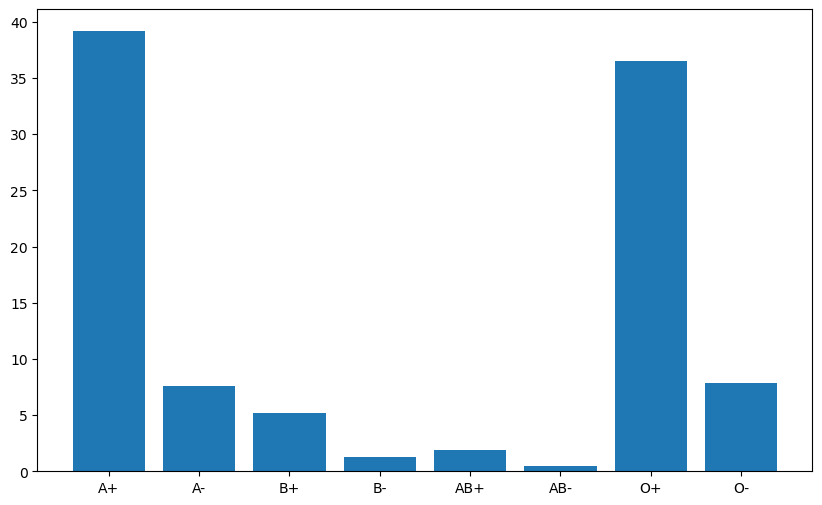

In [9]:
import matplotlib.pyplot as plt

valid_blood_combinations = [('A', '+'),('A', '-'),('B', '+'), ('B', '-'), ('AB', '+'), ('AB', '-'), ('O', '+'), ('O', '-')]
frequencies = []
for combo in valid_blood_combinations:
    frequency = ((df['tipo_abo'] == combo[0]) & (df['tipo_rh'] == combo[1])).sum()
    frequencies.append(frequency)

total = sum(frequencies)
for x in range(len(frequencies)):
    frequencies[x] = frequencies[x] / total * 100


plt.figure(figsize=(10, 6))
plt.bar(range(len(valid_blood_combinations)), frequencies, tick_label=[f'{a}{b}' for a, b in valid_blood_combinations])
plt.show()

# Representação dos consumos atraves do tempo

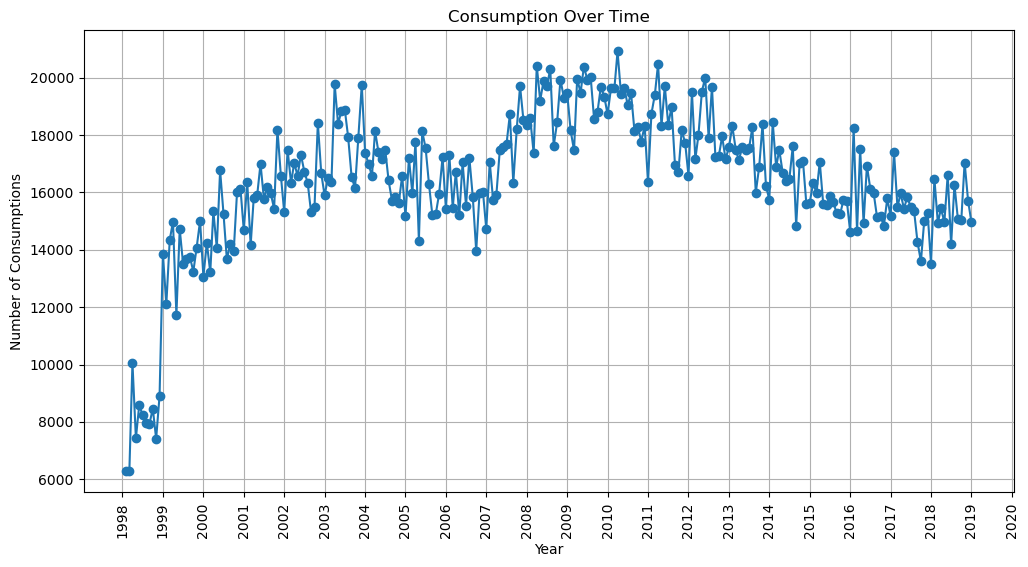

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['data_saida'] = pd.to_datetime(df['data_saida'])

monthly_colheitas = df.groupby(df['data_saida'].dt.to_period('M')).size()

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_colheitas.index.to_timestamp(), monthly_colheitas.values, marker='o', linestyle='-')
plt.title("Consumption Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Consumptions")
plt.grid(True)

ax = plt.gca()
years = mdates.YearLocator(month=12, day=1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.xticks(rotation=90)

plt.show()

# Consumo por localidade

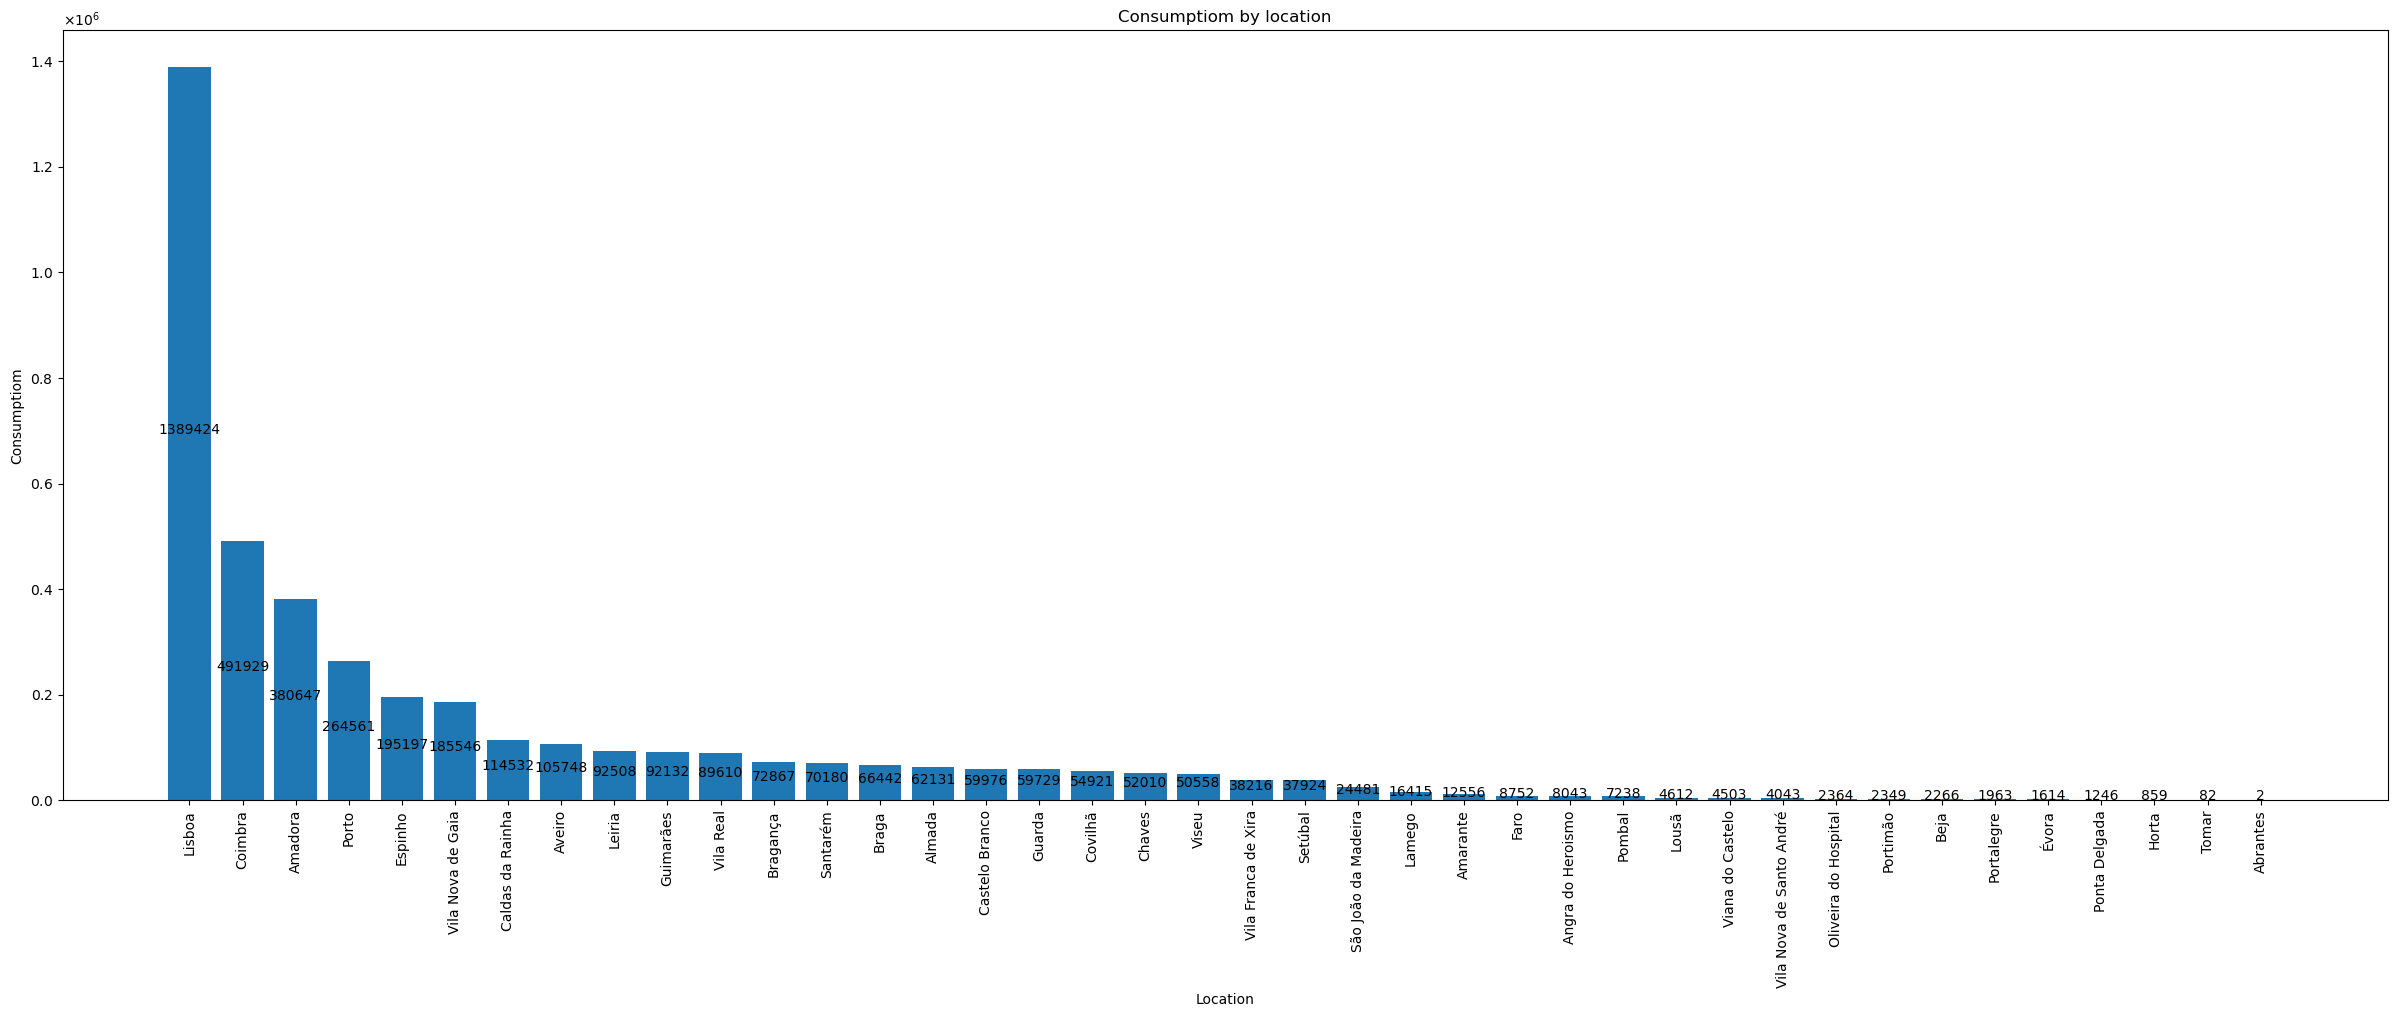

In [11]:
from matplotlib.ticker import ScalarFormatter

def translate_postal_code(value):
    if value == 10:
        return "Lisboa"
    elif value == 20:
        return "Santarém"
    elif value == 22:
        return "Abrantes"
    elif value == 23:
        return "Tomar"
    elif value == 24:
        return "Leiria"
    elif value == 25:
        return "Caldas da Rainha"
    elif value == 26:
        return "Vila Franca de Xira"
    elif value == 27:
        return "Amadora"
    elif value == 28:
        return "Almada"
    elif value == 29:
        return "Setúbal"
    elif value == 30:
        return "Coimbra"
    elif value == 31:
        return "Pombal"
    elif value == 32:
        return "Lousã"
    elif value == 34:
        return "Oliveira do Hospital"
    elif value == 35:
        return "Viseu"
    elif value == 37:
        return "São João da Madeira"
    elif value == 38:
        return "Aveiro"
    elif value == 40:
        return "Porto"
    elif value == 44:
        return "Vila Nova de Gaia"
    elif value == 45:
        return "Espinho"
    elif value == 46:
        return "Amarante"
    elif value == 47:
        return "Braga"
    elif value == 48:
        return "Guimarães"
    elif value == 49:
        return "Viana do Castelo"
    elif value == 50:
        return "Vila Real"
    elif value == 51:
        return "Lamego"
    elif value == 53:
        return "Bragança"
    elif value == 54:
        return "Chaves"
    elif value == 60:
        return "Castelo Branco"
    elif value == 62:
        return "Covilhã"
    elif value == 63:
        return "Guarda"
    elif value == 70:
        return "Évora"
    elif value == 73:
        return "Portalegre"
    elif value == 75:
        return "Vila Nova de Santo André"
    elif value == 78:
        return "Beja"
    elif value == 80:
        return "Faro"
    elif value == 85:
        return "Portimão"
    elif value == 95:
        return "Ponta Delgada"
    elif value == 97:
        return "Angra do Heroismo"
    elif value == 99:
        return "Horta"
    else:
        return "Default Case"

def preprocess_codigo_postal(value):
    value = int(value)
    if 10 <= value < 20:
        return 10
    elif 40 <= value <= 43:
        return 40
    else:
        return value


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

df['codigo_postal_grouped'] = df['codigo_postal_2_digitos'].apply(preprocess_codigo_postal).apply(translate_postal_code)

frequencies = df['codigo_postal_grouped'].value_counts()
valid_blood_combinations = frequencies.index

plt.figure(figsize=(30, 10))
plt.bar(range(len(valid_blood_combinations)), frequencies.values)
plt.xticks(range(len(valid_blood_combinations)), [f'{comb}' for comb in valid_blood_combinations])
plt.title("Consumptiom by location")
plt.xlabel("Location")
plt.ylabel("Consumptiom")
plt.xticks(rotation=90) 
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
addlabels(range(len(valid_blood_combinations)), frequencies.values)
plt.show()

# Consumos por Instituição em Coimbra

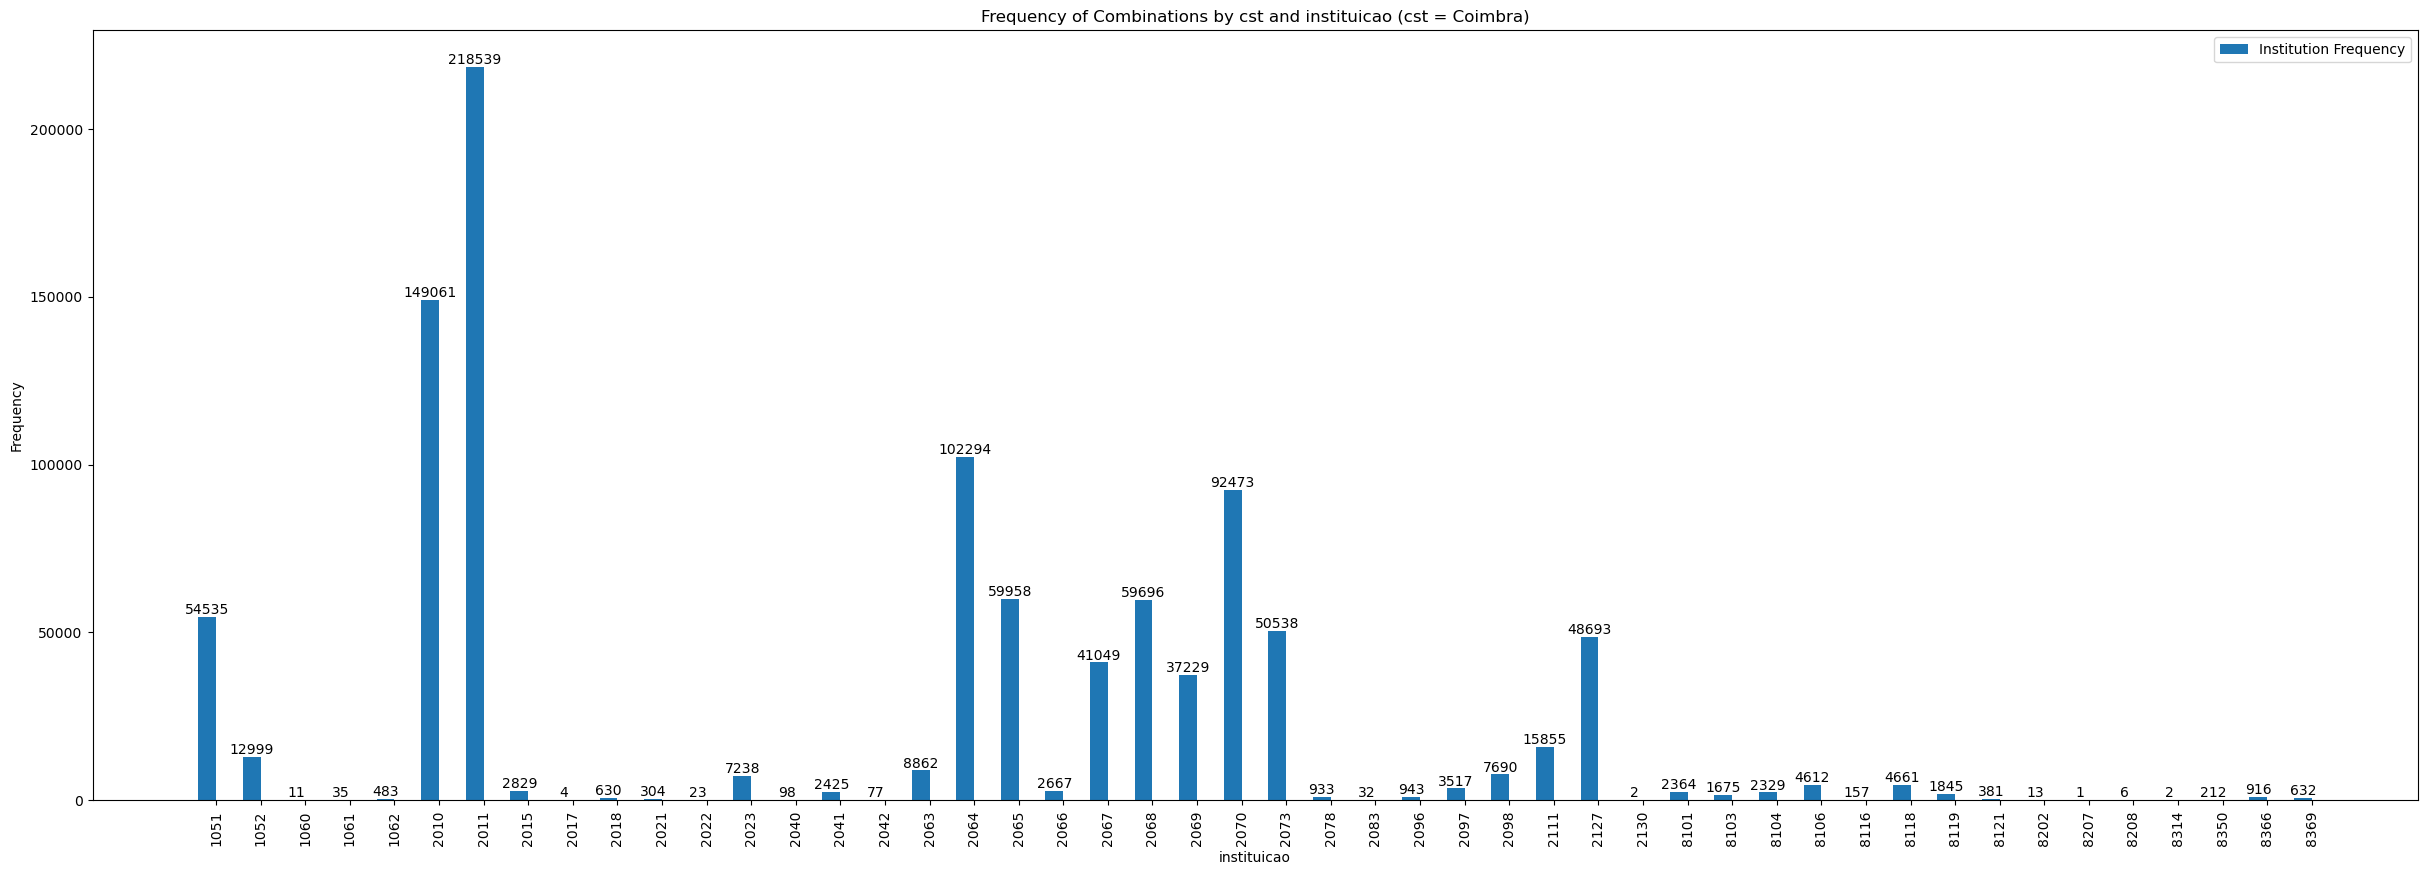

TRANSFERENCIAS
1060 PORTO:  3294
1062 LISBOA:  267759


In [43]:
import matplotlib.pyplot as plt

filtered_df = df[df['cst'] == "Coimbra"]

pivot_df = filtered_df.pivot_table(index=['cst', 'instituicao'], aggfunc='size')

pivot_df = pivot_df.reset_index(name='Frequency')

bar_width = 0.4
spacing = 1

fig, ax = plt.subplots(figsize=(30, 10))

x = range(len(pivot_df))
bars = ax.bar(x, pivot_df['Frequency'], width=bar_width, label='Institution Frequency')

plt.title('Frequency of Combinations by cst and instituicao (cst = Coimbra)')
plt.xlabel('instituicao')
plt.ylabel('Frequency')
plt.xticks([pos + bar_width / 2 for pos in x], pivot_df['instituicao'].tolist(), rotation=90)

for bar, freq in zip(bars, pivot_df['Frequency']):
    ax.annotate(freq, (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom')

plt.legend()

plt.show()

print("TRANSFERENCIAS")
print("1060 PORTO: ", ((dropped_records['cst'] == "Coimbra") & (dropped_records['instituicao'] == 1060)).sum())
print("1062 LISBOA: ", ((dropped_records['cst'] == "Coimbra") & (dropped_records['instituicao'] == 1062)).sum())



# Consumos por Instituição em Lisboa

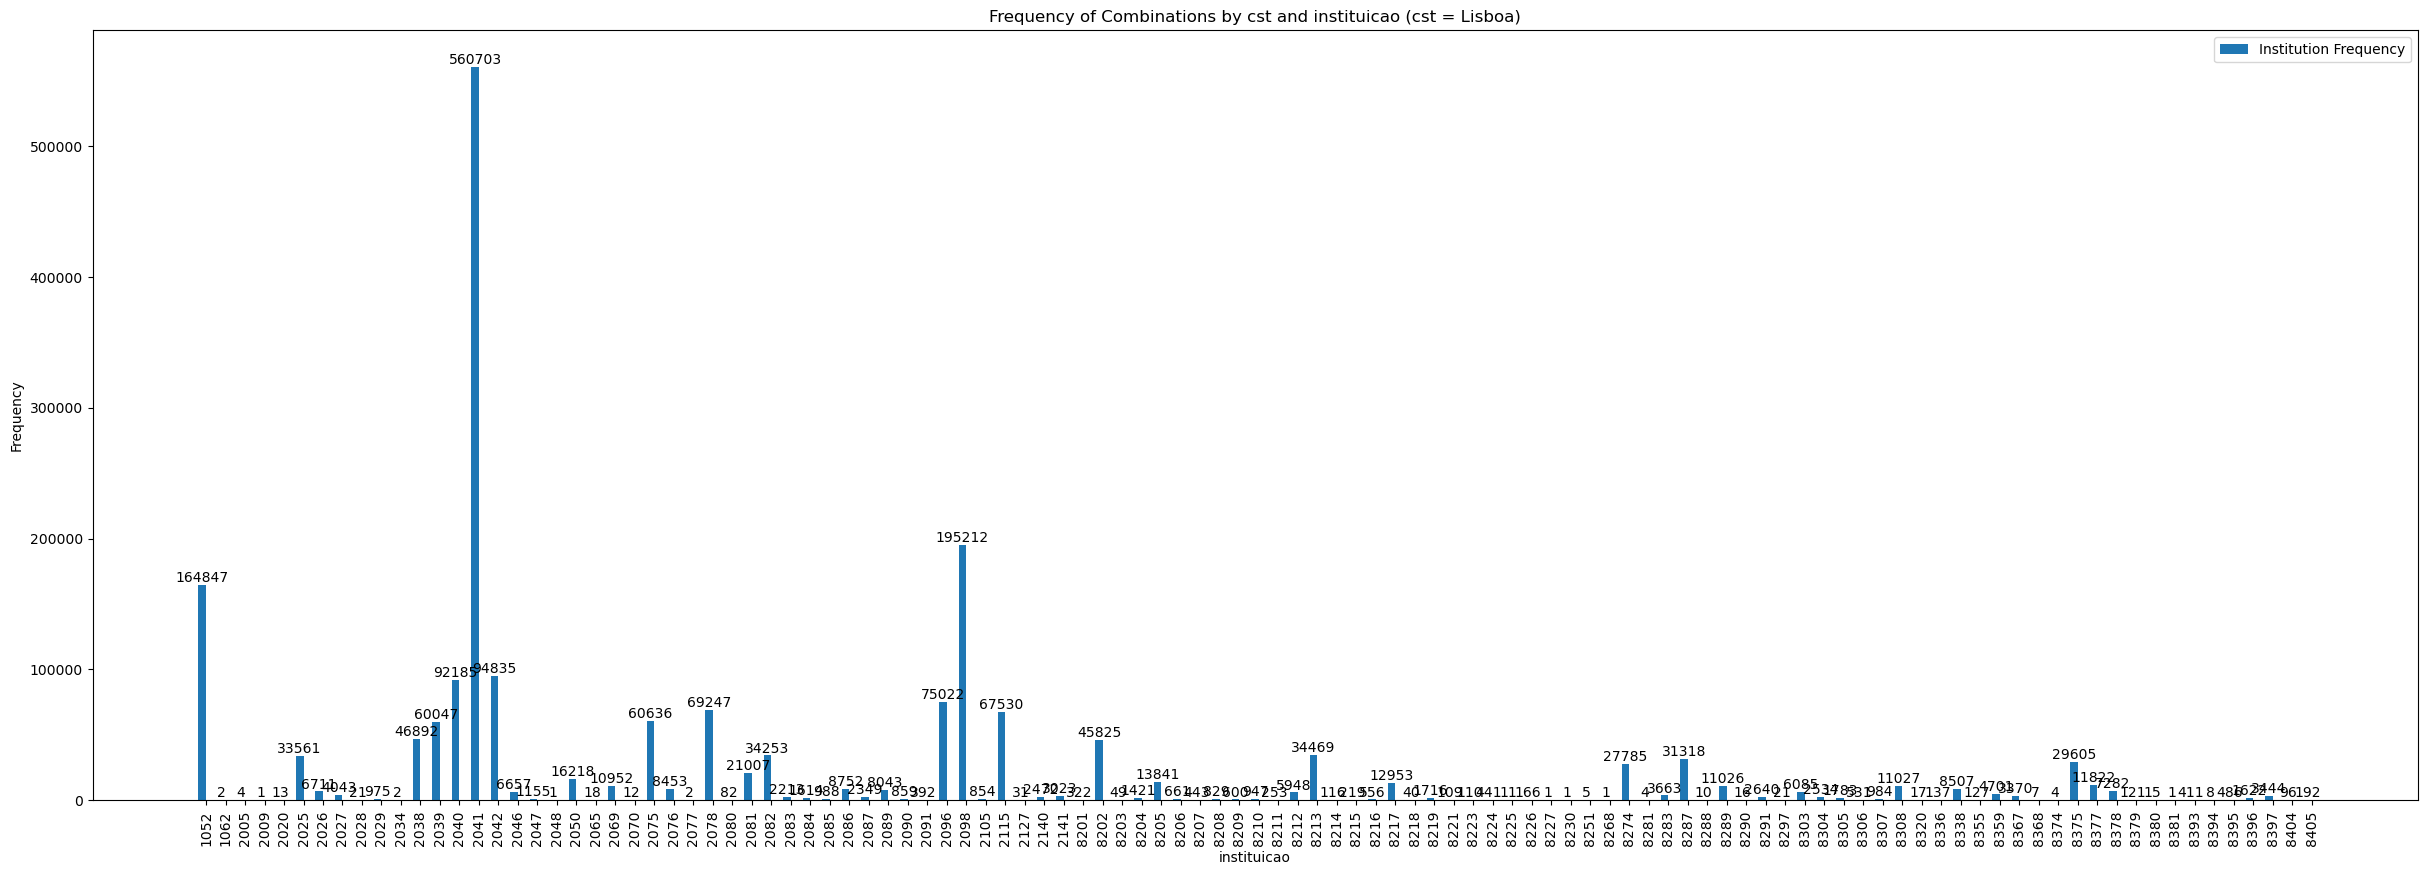

TRANSFERENCIAS
1060 PORTO:  3784
1061 COIMBRA:  538


In [44]:
import matplotlib.pyplot as plt

filtered_df = df[df['cst'] == "Lisboa"]

pivot_df = filtered_df.pivot_table(index=['cst', 'instituicao'], aggfunc='size')

pivot_df = pivot_df.reset_index(name='Frequency')

bar_width = 0.4
spacing = 1

fig, ax = plt.subplots(figsize=(30, 10))

x = range(len(pivot_df))
bars = ax.bar(x, pivot_df['Frequency'], width=bar_width, label='Institution Frequency')

plt.title('Frequency of Combinations by cst and instituicao (cst = Lisboa)')
plt.xlabel('instituicao')
plt.ylabel('Frequency')
plt.xticks([pos + bar_width / 2 for pos in x], pivot_df['instituicao'].tolist(), rotation=90)

for bar, freq in zip(bars, pivot_df['Frequency']):
    ax.annotate(freq, (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom')

plt.legend()

plt.show()

print("TRANSFERENCIAS")
print("1060 PORTO: ", ((dropped_records['cst'] == "Lisboa") & (dropped_records['instituicao'] == 1060)).sum())
print("1061 COIMBRA: ", ((dropped_records['cst'] == "Lisboa") & (dropped_records['instituicao'] == 1061)).sum())


# Consumos por Instituição no Porto

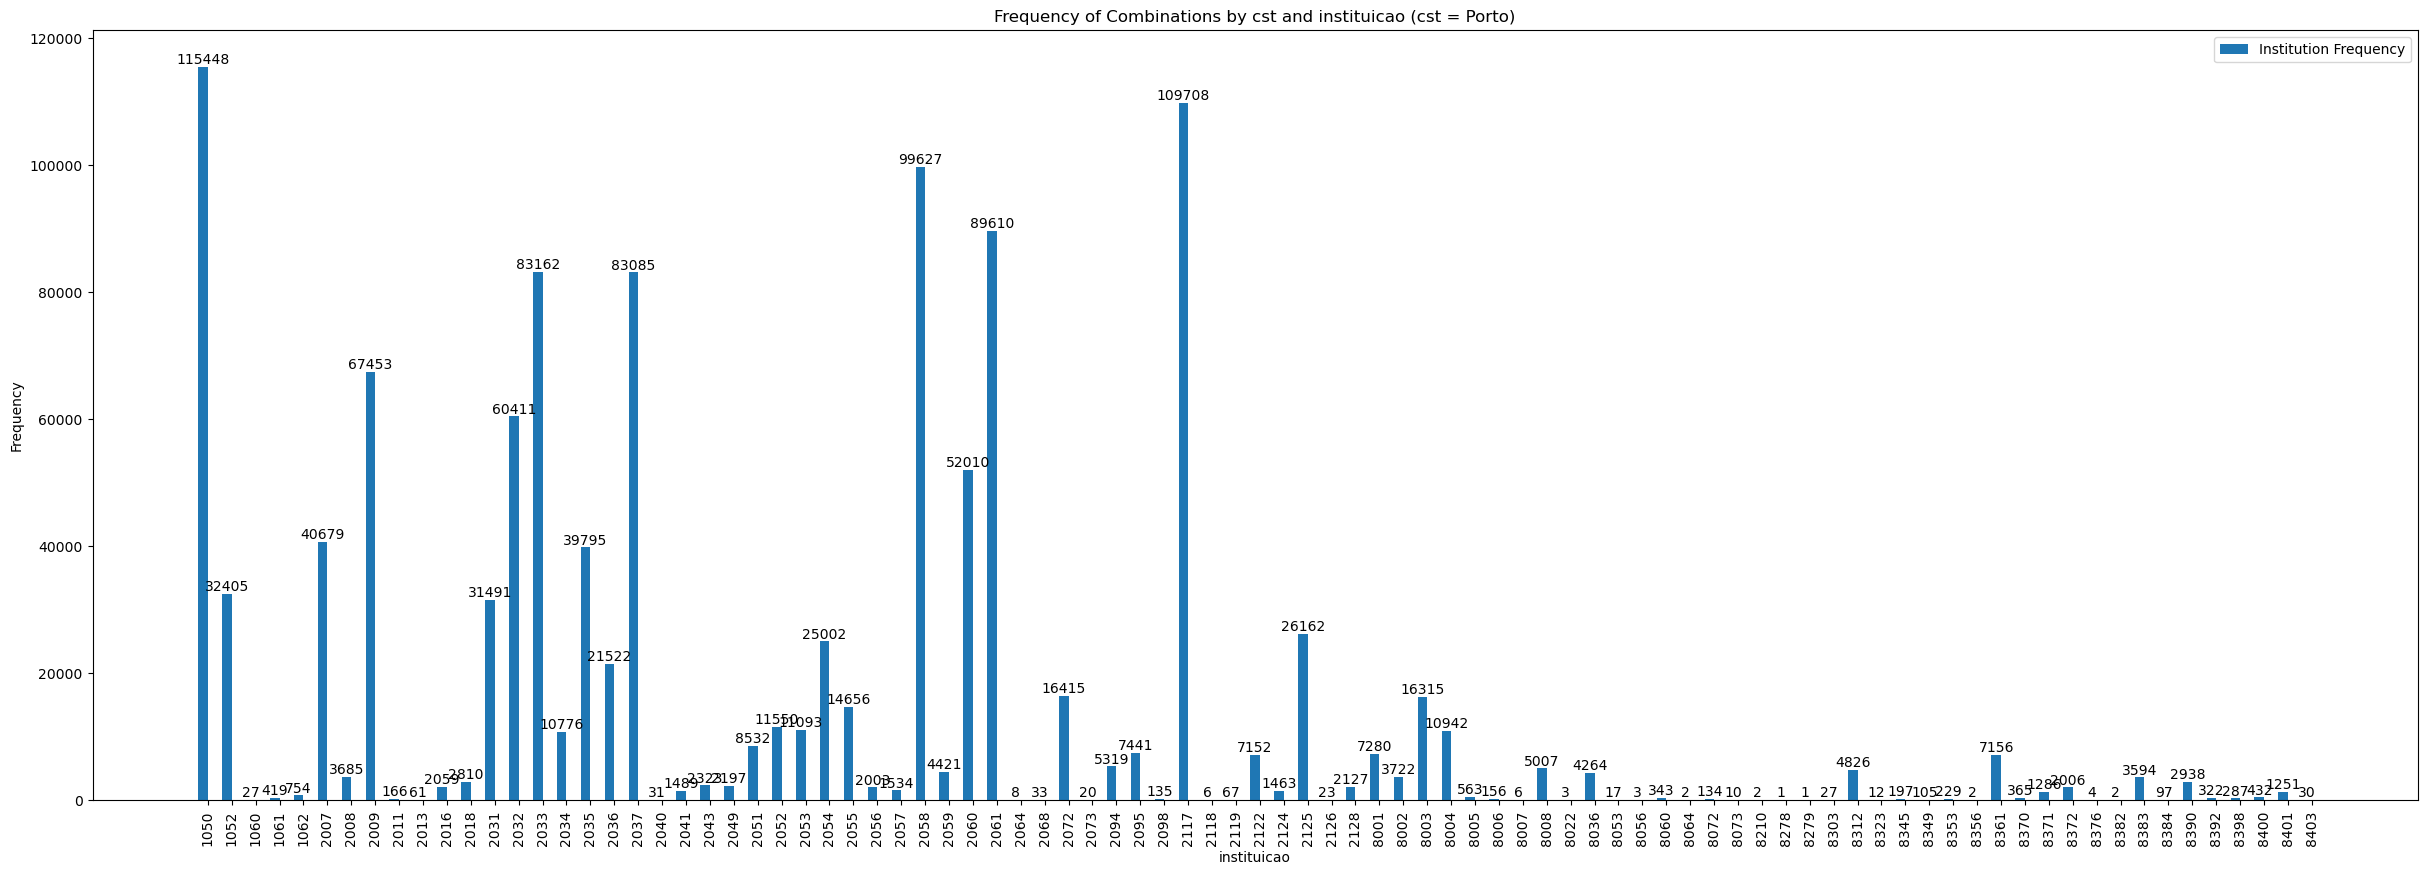

TRANSFERENCIAS
1061 COIMBRA:  13154
1062 LISBOA:  200681


In [45]:
import matplotlib.pyplot as plt

filtered_df = df[df['cst'] == "Porto"]

pivot_df = filtered_df.pivot_table(index=['cst', 'instituicao'], aggfunc='size')

pivot_df = pivot_df.reset_index(name='Frequency')

bar_width = 0.4
spacing = 1

fig, ax = plt.subplots(figsize=(30, 10))

x = range(len(pivot_df))
bars = ax.bar(x, pivot_df['Frequency'], width=bar_width, label='Institution Frequency')

plt.title('Frequency of Combinations by cst and instituicao (cst = Porto)')
plt.xlabel('instituicao')
plt.ylabel('Frequency')
plt.xticks([pos + bar_width / 2 for pos in x], pivot_df['instituicao'].tolist(), rotation=90)

for bar, freq in zip(bars, pivot_df['Frequency']):
    ax.annotate(freq, (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom')

plt.legend()

plt.show()


print("TRANSFERENCIAS")
print("1061 COIMBRA: ", ((dropped_records['cst'] == "Porto") & (dropped_records['instituicao'] == 1061)).sum())
print("1062 LISBOA: ", ((dropped_records['cst'] == "Porto") & (dropped_records['instituicao'] == 1062)).sum())


# Consumos atraves do tempo por cst

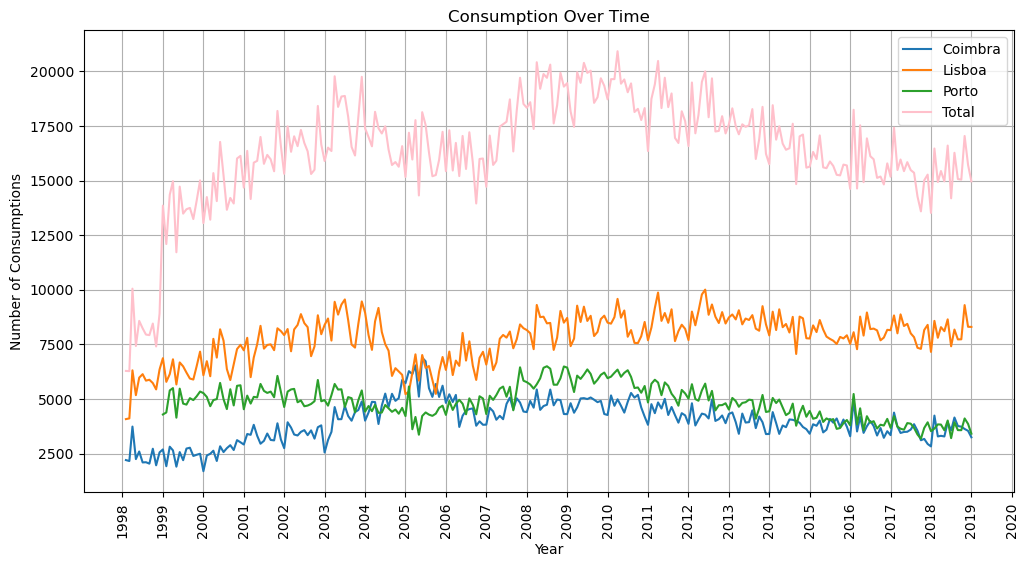

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming your DataFrame is named df
df['data_saida'] = pd.to_datetime(df['data_saida'])

# Group the data by location and month and count the number of "colheitas" in each month
monthly_colheitas = df.groupby(['cst', df['data_saida'].dt.to_period('M')]).size()
total_colheitas = df.groupby(df['data_saida'].dt.to_period('M')).size()

# Get a list of unique locations
unique_locations = df['cst'].unique()

# Create a time series plot with a separate line for each location
plt.figure(figsize=(12, 6))
for location in unique_locations:
    location_data = monthly_colheitas[location]
    plt.plot(location_data.index.to_timestamp(), location_data.values, label=location)

# Plot the sum of all locations
plt.plot(total_colheitas.index.to_timestamp(), total_colheitas.values, label="Total",linestyle='-', color='pink')

plt.title("Consumption Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Consumptions")
plt.legend()
plt.grid(True)

# Customize x-axis labels to display the years every 5 years
ax = plt.gca()
years = mdates.YearLocator(month=12, day=1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()


# Consumos por tipo de sangue ao longo do tempo

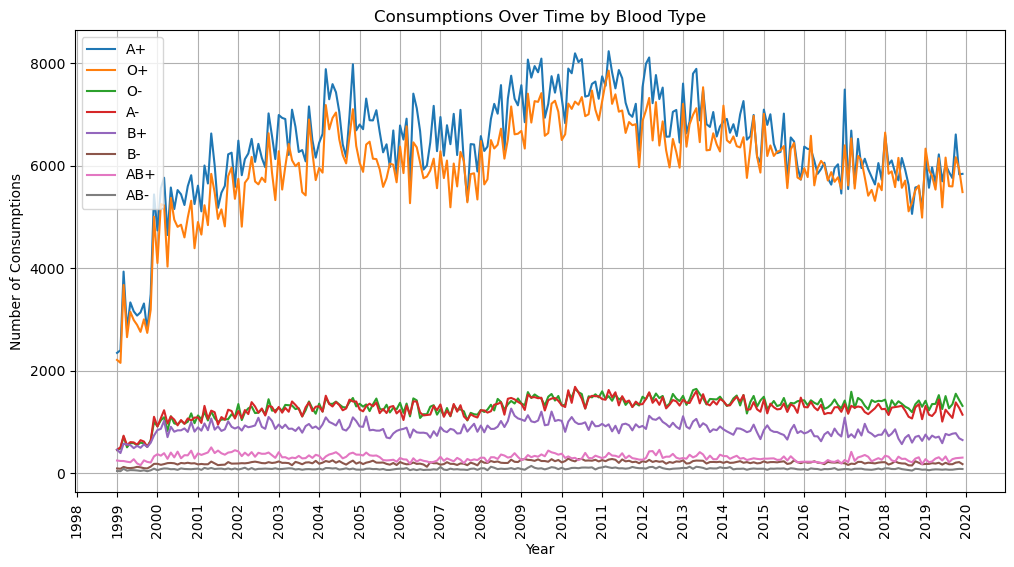

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define valid blood combinations and their associated colors
valid_blood_combinations = [('A', '+'), ('A', '-'), ('B', '+'), ('B', '-'), ('AB', '+'), ('AB', '-'), ('O', '+'), ('O', '-')]
""" combination_colors = {
    ('A', '+'): 'blue',
    ('A', '-'): 'red',
    ('B', '+'): 'brown',
    ('B', '-'): 'purple',
    ('AB', '+'): 'darkorange',
    ('AB', '-'): 'pink',
    ('O', '+'): 'darkorange',
    ('O', '-'): 'green'
} """

df['Month'] = df['data_saida'].dt.to_period('M')
monthly_Consumptions = df.groupby(['tipo_abo', 'tipo_rh', 'Month']).size().unstack(level=[0, 1], fill_value=0)

plt.figure(figsize=(12, 6))
unique_combinations = df[['tipo_abo', 'tipo_rh']].drop_duplicates()
for _, combination in unique_combinations.iterrows():
    combination_data = monthly_Consumptions[combination['tipo_abo']][combination['tipo_rh']]
    #combination_color = combination_colors.get((combination['tipo_abo'], combination['tipo_rh']), 'black')
    plt.plot(combination_data.index.to_timestamp(), combination_data.values, linestyle='-',
             label=f"{combination['tipo_abo']}{combination['tipo_rh']}")

plt.title("Consumptions Over Time by Blood Type")
plt.xlabel("Year")
plt.ylabel("Number of Consumptions")
plt.legend(loc='upper left')
plt.grid(True)

ax = plt.gca()
years = mdates.YearLocator(month=1, day=1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.xticks(rotation=90)

plt.show()


# Consumos ao longo dos meses nos diferentes anos

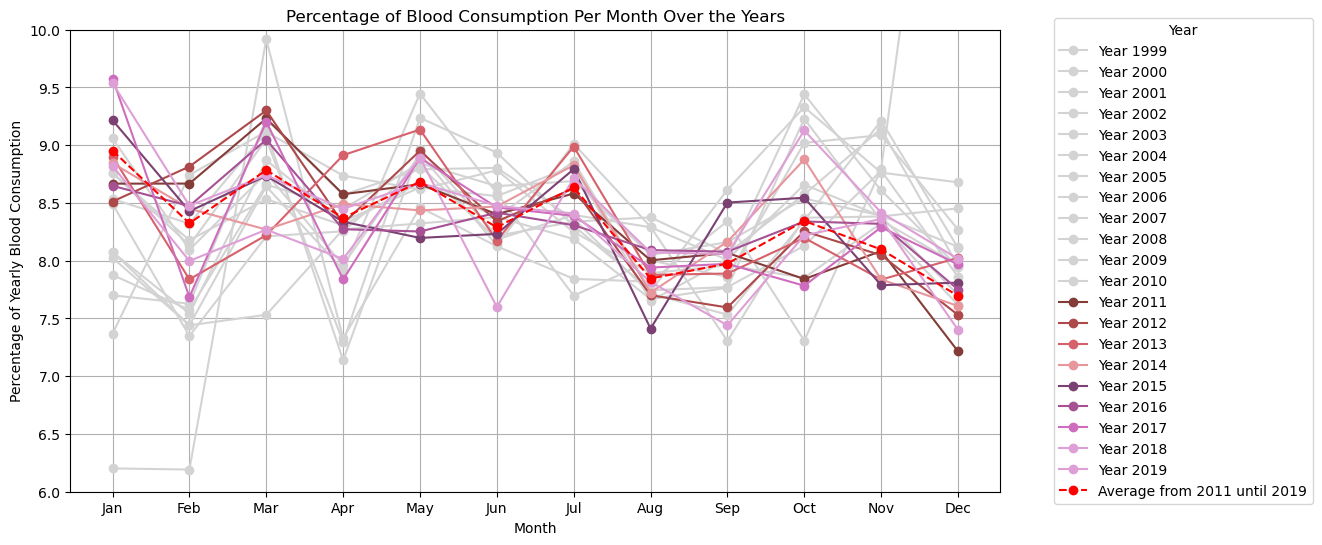

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar
import numpy as np

df['data_saida'] = pd.to_datetime(df['data_saida'])
df['Year'] = df['data_saida'].dt.year
df['Month'] = df['data_saida'].dt.month

plt.figure(figsize=(12, 6))
years = df['Year'].unique()
n_colors = len(years)
colors = plt.colormaps["tab20b"](np.linspace(0, 1, n_colors))

years = sorted(years)

average_values = []

for year, color in zip(years, colors):
    year_data = df[df['Year'] == year]
    monthly_colheitas = year_data.groupby('Month').size()
    total_year = sum(monthly_colheitas.values)
    monthly_colheitas_percentage = (monthly_colheitas / total_year) * 100

    if 2011 <= year:
        average_values.append(monthly_colheitas.values)
        plt.plot(monthly_colheitas_percentage.index, monthly_colheitas_percentage.values, marker='o', linestyle='-', label=f"Year {year}", color=color)
    else:
        plt.plot(monthly_colheitas_percentage.index, monthly_colheitas_percentage.values, marker='o', linestyle='-', label=f"Year {year}", color='lightgrey')

average_values = np.mean(average_values, axis=0)
total_average_years = sum(average_values)
average_values_percentage = (average_values / total_average_years) * 100
plt.plot(monthly_colheitas.index, average_values_percentage, marker='o', linestyle='--', label='Average from 2011 until 2019', color='red')

plt.title("Percentage of Blood Consumption Per Month Over the Years")
plt.xlabel("Month")
plt.ylabel("Percentage of Yearly Blood Consumption")
plt.grid(True)


plt.ylim(6, 10)
ax = plt.gca()
months = mdates.MonthLocator()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))

month_names = [calendar.month_abbr[i] for i in range(1, 13)]
ax.set_xticks(monthly_colheitas.index)
ax.set_xticklabels(month_names)

handles, labels = ax.get_legend_handles_labels()
sorted_handles = [handles[labels.index(f"Year {year}")] for year in years]
sorted_handles.append(handles[labels.index('Average from 2011 until 2019')])
sorted_labels = [f"Year {year}" for year in years]
sorted_labels.append('Average from 2011 until 2019')
ax.legend(sorted_handles, sorted_labels, title="Year", loc='center left', bbox_to_anchor=(1.05, 0.5))

plt.show()


# Simple Linear Regression (1 week)

Mean Squared Error: 156551.45546388897
R-squared (R2) Score: 0.6260928051233179
Predicted Collections for the week starting on: 2020-01-05 00:00:00
Predicted Collections for Next Week: 3094


c:\Users\gonca\anaconda3\envs\IST_DL21_Env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


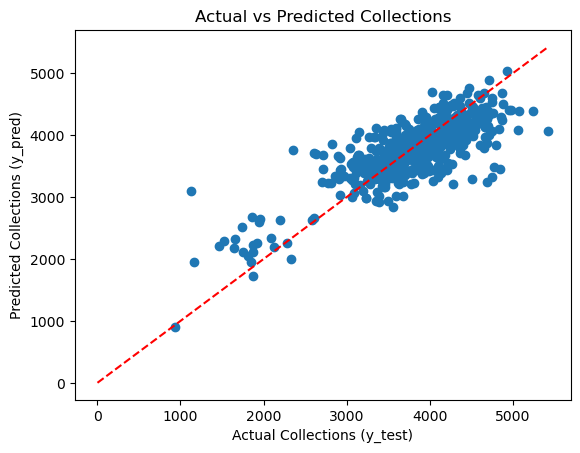

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 

df['data_saida'] = pd.to_datetime(df['data_saida'])

df_weekly = df.set_index('data_saida').resample('W').count()

df_weekly['Consumptions_next_week'] = df_weekly['componente'].shift(-1)
df_weekly.dropna(inplace=True)

X = df_weekly.drop('Consumptions_next_week', axis=1)
y = df_weekly['Consumptions_next_week']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

last_week_features = X.iloc[-1, :].values.reshape(1, -1)
predicted_next_week_Consumptions = regression_model.predict(last_week_features)

last_week_timestamp = X.index[-1]

next_week_timestamp = last_week_timestamp + pd.DateOffset(weeks=1)

print(f"Predicted Consumptions for the week starting on: {next_week_timestamp}")
print(f"Predicted Consumptions for Next Week: {int(np.round(predicted_next_week_Consumptions[0]))}")

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Consumptions (y_test)')
plt.ylabel('Predicted Consumptions (y_pred)')
plt.title('Actual vs Predicted Consumptions')

max_value = max(y_test.max(), y_pred.max())
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--')

plt.show()


# Simple Linear Regression (1 month)

Mean Squared Error: 1859367.2818752925
R-squared (R2) Score: 0.6986667325010598
Predicted Collections for the month starting on: 2019-12-30 00:00:00
Predicted Collections for Next Month: 15943


c:\Users\gonca\anaconda3\envs\IST_DL21_Env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


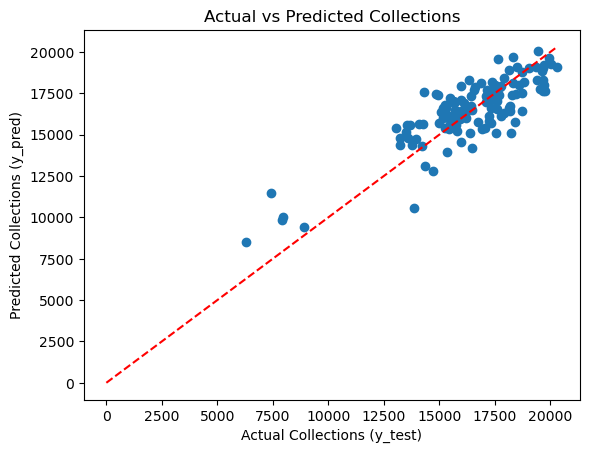

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df['data_saida'] = pd.to_datetime(df['data_saida'])

df_monthly = df.set_index('data_saida').resample('M').count()

df_monthly['Consumptions_next_month'] = df_monthly['componente'].shift(-1)
df_monthly.dropna(inplace=True)

X = df_monthly.drop('Consumptions_next_month', axis=1)
y = df_monthly['Consumptions_next_month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

last_month_features = X.iloc[-1, :].values.reshape(1, -1)
predicted_next_month_Consumptions = regression_model.predict(last_month_features)

last_month_timestamp = X.index[-1]

next_month_timestamp = last_month_timestamp + pd.DateOffset(months=1)

print(f"Predicted Consumptions for the month starting on: {next_month_timestamp}")
print(f"Predicted Consumptions for Next Month: {int(np.round(predicted_next_month_Consumptions[0]))}")

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Consumptions (y_test)')
plt.ylabel('Predicted Consumptions (y_pred)')
plt.title('Actual vs Predicted Consumptions')

max_value = max(y_test.max(), y_pred.max())
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--')

plt.show()

# Simple Linear Regression (3 months)

Mean Squared Error: 14893129.324458798
R-squared (R2) Score: 0.7251607760593205
Predicted Collections for the 3 months starting on: 2020-01-31 00:00:00
Predicted Collections for Next 3 Months: 47553


c:\Users\gonca\anaconda3\envs\IST_DL21_Env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


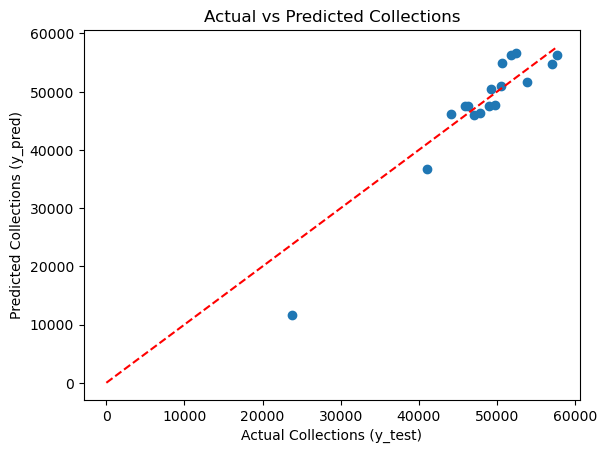

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df['data_saida'] = pd.to_datetime(df['data_saida'])

df_3_monthly = df.set_index('data_saida').resample('3M').count()

df_3_monthly['Consumptions_next_3_months'] = df_3_monthly['componente'].shift(-1)  # Assuming 'componente' is the count of Consumptions
df_3_monthly.dropna(inplace=True)

X = df_3_monthly.drop('Consumptions_next_3_months', axis=1)
y = df_3_monthly['Consumptions_next_3_months']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

last_3_months_features = X.iloc[-1, :].values.reshape(1, -1)
predicted_next_3_months_Consumptions = regression_model.predict(last_3_months_features)

last_3_months_timestamp = X.index[-1]

next_3_months_timestamp = last_3_months_timestamp + pd.DateOffset(months=3)

print(f"Predicted Consumptions for the 3 months starting on: {next_3_months_timestamp}")
print(f"Predicted Consumptions for Next 3 Months: {int(np.round(predicted_next_3_months_Consumptions[0]))}")

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Consumptions (y_test)')
plt.ylabel('Predicted Consumptions (y_pred)')
plt.title('Actual vs Predicted Consumptions')

max_value = max(y_test.max(), y_pred.max())
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--')

plt.show()


# Simple Linear Regression (6 months)

Mean Squared Error: 9.411477191714448e-23
R-squared (R2) Score: 1.0
Predicted Collections for the 6 months starting on: 2020-07-31 00:00:00
Predicted Collections for Next 6 Months: 77854


c:\Users\gonca\anaconda3\envs\IST_DL21_Env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


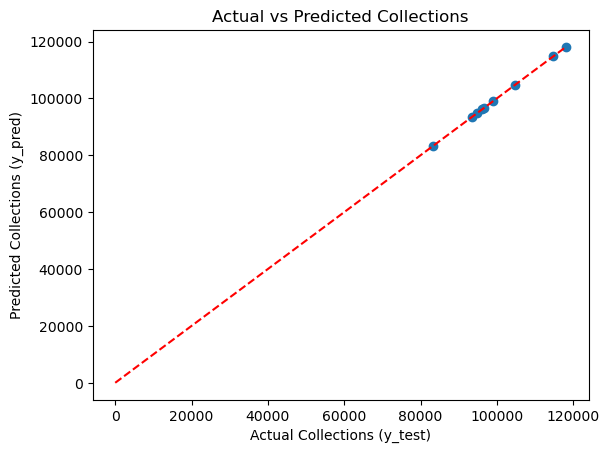

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df['data_saida'] = pd.to_datetime(df['data_saida'])

df_6_monthly = df.resample('6M', on='data_saida').count()
df_6_monthly['Consumptions_count_6_months'] = df_6_monthly['componente']

df_6_monthly.dropna(inplace=True)

X = df_6_monthly.drop('Consumptions_count_6_months', axis=1)
y = df_6_monthly['Consumptions_count_6_months']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

last_6_months_features = X.iloc[-1, :].values.reshape(1, -1)
predicted_next_6_months_Consumptions = regression_model.predict(last_6_months_features)

last_6_months_timestamp = X.index[-1]
next_6_months_timestamp = last_6_months_timestamp + pd.DateOffset(months=6)

print(f"Predicted Consumptions for the 6 months starting on: {next_6_months_timestamp}")
print(f"Predicted Consumptions for Next 6 Months: {int(np.round(predicted_next_6_months_Consumptions[0]))}")

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Consumptions (y_test)')
plt.ylabel('Predicted Consumptions (y_pred)')
plt.title('Actual vs Predicted Consumptions')

max_value = max(y_test.max(), y_pred.max())
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--')

plt.show()


# Simple Linear Regression (1 year)

Mean Squared Error: 7.199780051661553e-22
R-squared (R2) Score: 1.0
Predicted Collections for the year starting on: 2020-12-31 00:00:00
Predicted Collections for Next 1 Year: 186742


c:\Users\gonca\anaconda3\envs\IST_DL21_Env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


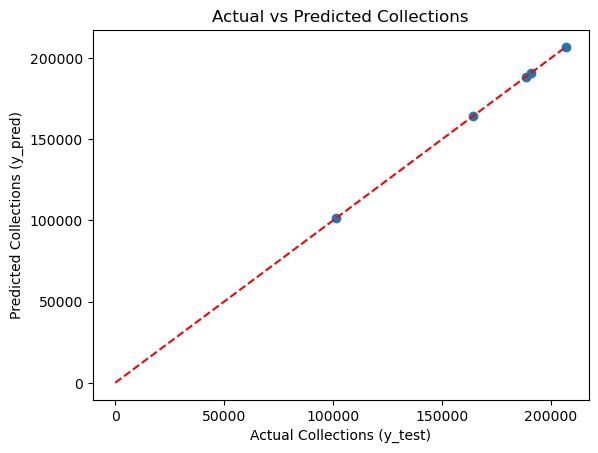

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df['data_saida'] = pd.to_datetime(df['data_saida'])

df_1_yearly = df.resample('1Y', on='data_saida').count()
df_1_yearly['Consumptions_count_1_year'] = df_1_yearly['componente']

df_1_yearly.dropna(inplace=True)

X = df_1_yearly.drop('Consumptions_count_1_year', axis=1)
y = df_1_yearly['Consumptions_count_1_year']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

last_year_features = X.iloc[-1, :].values.reshape(1, -1)
predicted_next_year_Consumptions = regression_model.predict(last_year_features)

last_year_timestamp = X.index[-1]
next_year_timestamp = last_year_timestamp + pd.DateOffset(years=1)

print(f"Predicted Consumptions for the year starting on: {next_year_timestamp}")
print(f"Predicted Consumptions for Next 1 Year: {int(np.round(predicted_next_year_Consumptions[0]))}")

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Consumptions (y_test)')
plt.ylabel('Predicted Consumptions (y_pred)')
plt.title('Actual vs Predicted Consumptions')

max_value = max(y_test.max(), y_pred.max())
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--')

plt.show()


# Simple Exponential Smoothing (1 month)

Predicted Consumptions for the month starting on: 2020-01-31 00:00:00
Predicted Consumptions for Next Month: 15836


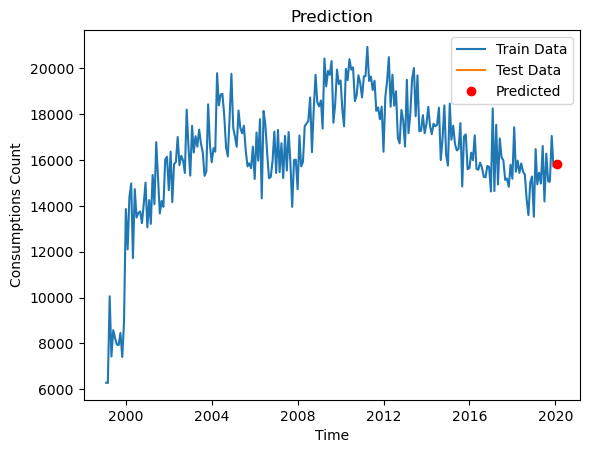

Mean Absolute Error (MAE): 867.3141108315976
Mean Squared Error (MSE): 752233.7668476049
Root Mean Squared Error (RMSE): 867.3141108315976
Mean Absolute Percentage Error (MAPE): 5.79%


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df['data_saida'] = pd.to_datetime(df['data_saida'])

df_monthly = df.set_index('data_saida').resample('M').count()
df_monthly['Consumptions_next_month'] = df_monthly['componente']

Consumptions_data = df_monthly['Consumptions_next_month'] 
train_data = Consumptions_data.iloc[:-1]
test_data = Consumptions_data.iloc[-1:]

model = SimpleExpSmoothing(train_data)
model_fit = model.fit()

predictions = model_fit.forecast(1)

last_month_timestamp = Consumptions_data.index[-1]

next_month_timestamp = last_month_timestamp + pd.DateOffset(months=1)

print(f"Predicted Consumptions for the month starting on: {next_month_timestamp}")
print(f"Predicted Consumptions for Next Month: {int(np.round(predictions[0]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_month_timestamp, predictions[0], 'ro', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Consumptions Count')
plt.title('Prediction')

plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Simple Exponential Smoothing (3 months)

Predicted Collections for the month starting on: 2020-01-31 00:00:00
Predicted Collections for the next 3 Months: 2019-10-31    15353.584927
2019-11-30    15353.584927
2019-12-31    15353.584927
Freq: M, dtype: float64


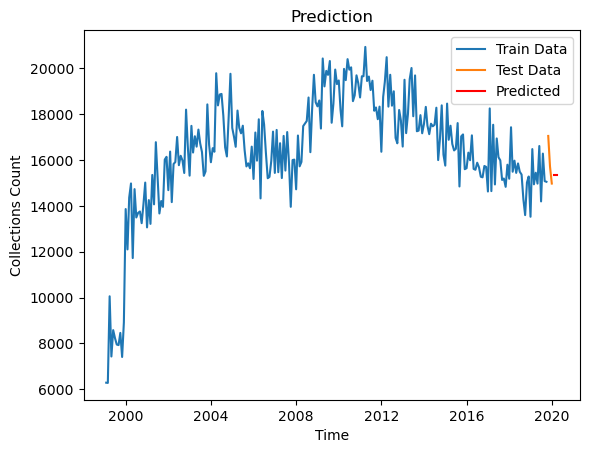

Mean Absolute Error (MAE): 813.8050243767375
Mean Squared Error (MSE): 1047439.5637527601
Root Mean Squared Error (RMSE): 1023.444949058209
Mean Absolute Percentage Error (MAPE): 4.94%


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df['data_saida'] = pd.to_datetime(df['data_saida'])

df_monthly = df.set_index('data_saida').resample('M').count()
df_monthly['Consumptions_next_month'] = df_monthly['componente']

Consumptions_data = df_monthly['Consumptions_next_month']
train_data = Consumptions_data.iloc[:-3]
test_data = Consumptions_data.iloc[-3:]

df_monthly.sort_index(inplace=True)

model = SimpleExpSmoothing(train_data)
model_fit = model.fit(remove_bias=True)

predictions = model_fit.forecast(3)

last_month_timestamp = Consumptions_data.index[-1]
next_month_timestamp = last_month_timestamp + pd.DateOffset(months=1)
next_3_months_timestamp = last_month_timestamp + pd.DateOffset(months=3)

print(f"Predicted Consumptions for the month starting on: {next_month_timestamp}")
print(f"Predicted Consumptions for the next 3 Months: {predictions}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(pd.date_range(start=next_month_timestamp, periods=3, freq='M'), predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Consumptions Count')
plt.title('Prediction')

plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Simple Exponential Smoothing (6 months) 

Predicted Collections for the month starting on: 2020-01-31 00:00:00
Predicted Collections for the next 6 Months: 2019-07-31    15225.869233
2019-08-31    15225.869233
2019-09-30    15225.869233
2019-10-31    15225.869233
2019-11-30    15225.869233
2019-12-31    15225.869233
Freq: M, dtype: float64


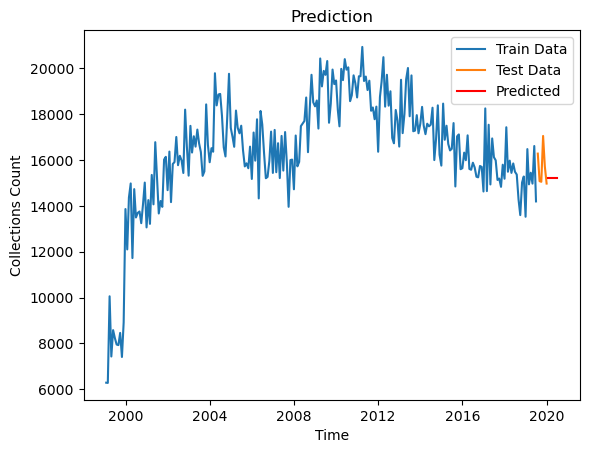

Mean Absolute Error (MAE): 658.1666666666666
Mean Squared Error (MSE): 795688.3892370956
Root Mean Squared Error (RMSE): 892.0136709922643
Mean Absolute Percentage Error (MAPE): 4.03%


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df['data_saida'] = pd.to_datetime(df['data_saida'])

df_monthly = df.set_index('data_saida').resample('M').count()
df_monthly['Consumptions_next_month'] = df_monthly['componente']

Consumptions_data = df_monthly['Consumptions_next_month']
train_data = Consumptions_data.iloc[:-6]
test_data = Consumptions_data.iloc[-6:]

model = SimpleExpSmoothing(train_data)
model_fit = model.fit(remove_bias=True)

predictions = model_fit.forecast(6)

last_month_timestamp = Consumptions_data.index[-1]
next_month_timestamp = last_month_timestamp + pd.DateOffset(months=1)
next_6_months_timestamp = last_month_timestamp + pd.DateOffset(months=6)

print(f"Predicted Consumptions for the month starting on: {next_month_timestamp}")
print(f"Predicted Consumptions for the next 6 Months: {predictions}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(pd.date_range(start=next_month_timestamp, periods=6, freq='M'), predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Consumptions Count')
plt.title('Prediction')

plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


# Simple Exponential Smoothing (1 year)

Predicted Consumptions for the month starting on: 2020-01-31 00:00:00
Predicted Consumptions for the next 12 Months: 2019-01-31    14487.262998
2019-02-28    14487.262998
2019-03-31    14487.262998
2019-04-30    14487.262998
2019-05-31    14487.262998
2019-06-30    14487.262998
2019-07-31    14487.262998
2019-08-31    14487.262998
2019-09-30    14487.262998
2019-10-31    14487.262998
2019-11-30    14487.262998
2019-12-31    14487.262998
Freq: M, dtype: float64


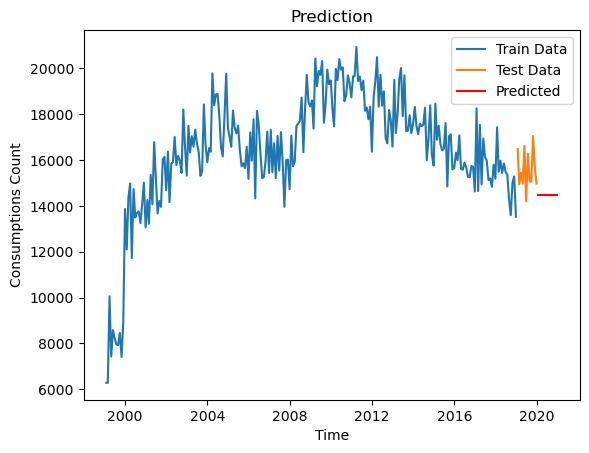

Mean Absolute Error (MAE): 1123.9475019512172
Mean Squared Error (MSE): 1833496.711867795
Root Mean Squared Error (RMSE): 1354.0667309508033
Mean Absolute Percentage Error (MAPE): 6.99%


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df['data_saida'] = pd.to_datetime(df['data_saida'])

df_monthly = df.set_index('data_saida').resample('M').count()
df_monthly['Consumptions_next_month'] = df_monthly['componente']

Consumptions_data = df_monthly['Consumptions_next_month']
train_data = Consumptions_data.iloc[:-12]
test_data = Consumptions_data.iloc[-12:]

model = SimpleExpSmoothing(train_data)
model_fit = model.fit(remove_bias=True)

predictions = model_fit.forecast(12)

last_month_timestamp = Consumptions_data.index[-1]
next_month_timestamp = last_month_timestamp + pd.DateOffset(months=1)
next_6_months_timestamp = last_month_timestamp + pd.DateOffset(months=12)

print(f"Predicted Consumptions for the month starting on: {next_month_timestamp}")
print(f"Predicted Consumptions for the next 12 Months: {predictions}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(pd.date_range(start=next_month_timestamp, periods=12, freq='M'), predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Consumptions Count')
plt.title('Prediction')

plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


# Holt Winter’s Exponential Smoothing (1 month)

c:\Users\gonca\anaconda3\envs\IST_DL21_Env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Predicted Collections for the month starting on: 2020-01-31 00:00:00
Predicted Collections for Next Month: 15195


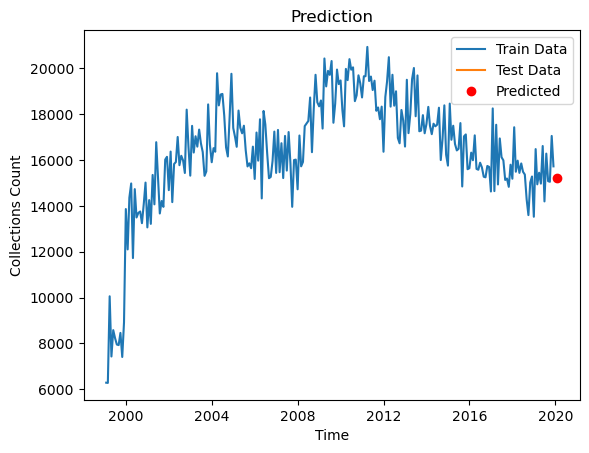

Mean Absolute Error (MAE): 226.07671286028926
Mean Squared Error (MSE): 51110.68009771368
Root Mean Squared Error (RMSE): 226.07671286028926
Mean Absolute Percentage Error (MAPE): 1.51%


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df_monthly = df.set_index('data_saida').resample('M').count()
df_monthly['Consumptions_next_month'] = df_monthly['componente']

Consumptions_data = df_monthly['Consumptions_next_month']

train_data = Consumptions_data.iloc[:-1]
test_data = Consumptions_data.iloc[-1:]

model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

predictions = model_fit.forecast(steps=1)

last_month_timestamp = Consumptions_data.index[-1]
next_month_timestamp = last_month_timestamp + pd.DateOffset(months=1)

print(f"Predicted Consumptions for the month starting on: {next_month_timestamp}")
print(f"Predicted Consumptions for Next Month: {int(np.round(predictions[0]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_month_timestamp, predictions[0], 'ro', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Consumptions Count')
plt.title('Prediction')
plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


# Holt Winter’s Exponential Smoothing (3 month)

c:\Users\gonca\anaconda3\envs\IST_DL21_Env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Predicted Collections for the next 3 Months:
2020-01-31 00:00:00: 15675
2020-02-29 00:00:00: 15527
2020-03-31 00:00:00: 14850


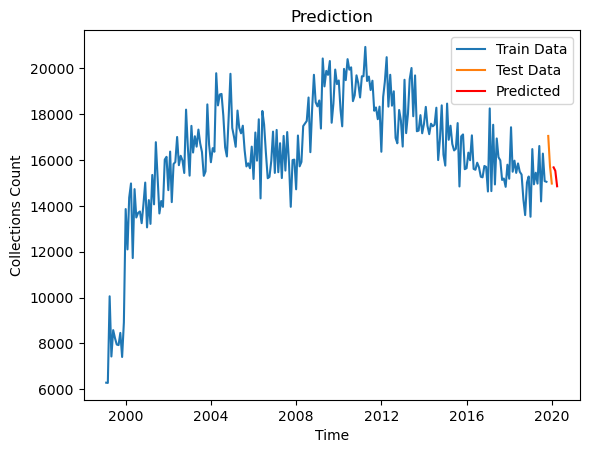

Mean Absolute Error (MAE): 560.3208615461808
Mean Squared Error (MSE): 642671.5683622748
Root Mean Squared Error (RMSE): 801.6679913544476
Mean Absolute Percentage Error (MAPE): 3.35%


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df['data_saida'] = pd.to_datetime(df['data_saida'])

df_monthly = df.set_index('data_saida').resample('M').count()
df_monthly['Consumptions_next_month'] = df_monthly['componente']

Consumptions_data = df_monthly['Consumptions_next_month']

train_data = Consumptions_data.iloc[:-3]
test_data = Consumptions_data.iloc[-3:]

model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

predictions = model_fit.forecast(steps=3)

last_month_timestamp = Consumptions_data.index[-1]
next_month_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, 4)]

print("Predicted Consumptions for the next 3 Months:")
for i in range(3):
    print(f"{next_month_timestamps[i]}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_month_timestamps, predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Consumptions Count')
plt.title('Prediction')
plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



# Holt Winter’s Exponential Smoothing (6 month)

c:\Users\gonca\anaconda3\envs\IST_DL21_Env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Predicted Collections for the next 6 Months:
2020-01-31 00:00:00: 15315
2020-02-29 00:00:00: 13797
2020-03-31 00:00:00: 13924
2020-04-30 00:00:00: 14666
2020-05-31 00:00:00: 14437
2020-06-30 00:00:00: 13646


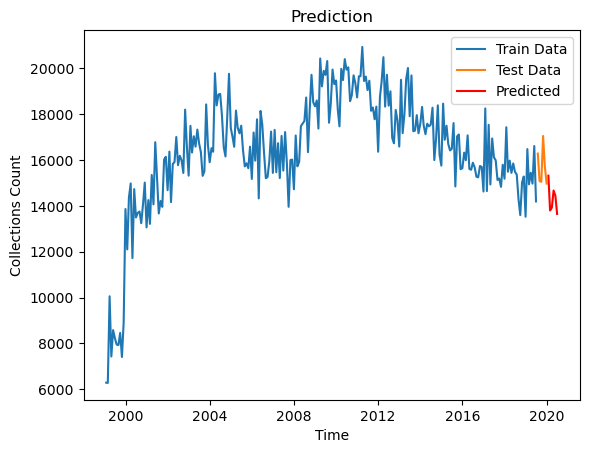

Mean Absolute Error (MAE): 1390.820787687616
Mean Squared Error (MSE): 2144819.6182112885
Root Mean Squared Error (RMSE): 1464.5202689656735
Mean Absolute Percentage Error (MAPE): 8.80%


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df['data_saida'] = pd.to_datetime(df['data_saida'])

df_monthly = df.set_index('data_saida').resample('M').count()
df_monthly['Consumptions_next_month'] = df_monthly['componente']

Consumptions_data = df_monthly['Consumptions_next_month']

train_data = Consumptions_data.iloc[:-6]
test_data = Consumptions_data.iloc[-6:]

model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

predictions = model_fit.forecast(steps=6)

last_month_timestamp = Consumptions_data.index[-1]
next_month_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, 7)]

print("Predicted Consumptions for the next 6 Months:")
for i in range(6):
    print(f"{next_month_timestamps[i]}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_month_timestamps, predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Consumptions Count')
plt.title('Prediction')
plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



# Holt Winter's Exponential Smoothing (1 year)

c:\Users\gonca\anaconda3\envs\IST_DL21_Env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Predicted Collections for the next 12 Months:
2020-01-31 00:00:00: 15540
2020-02-29 00:00:00: 14080
2020-03-31 00:00:00: 15368
2020-04-30 00:00:00: 14402
2020-05-31 00:00:00: 15186
2020-06-30 00:00:00: 14684
2020-07-31 00:00:00: 14868
2020-08-31 00:00:00: 13347
2020-09-30 00:00:00: 13452
2020-10-31 00:00:00: 14191
2020-11-30 00:00:00: 13949
2020-12-31 00:00:00: 13247


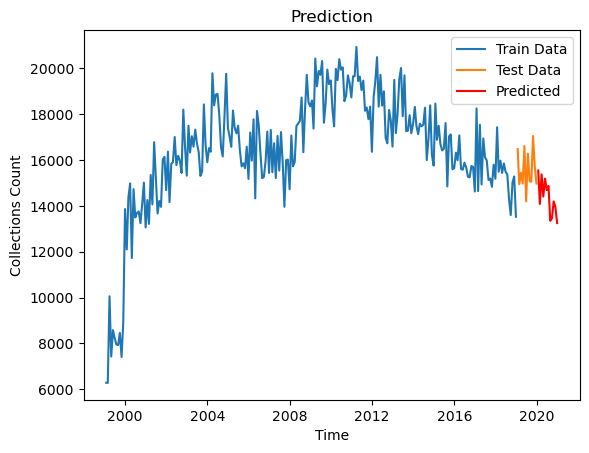

Mean Absolute Error (MAE): 1284.4685156423568
Mean Squared Error (MSE): 2161250.9004109087
Root Mean Squared Error (RMSE): 1470.119349036298
Mean Absolute Percentage Error (MAPE): 8.16%


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df['data_saida'] = pd.to_datetime(df['data_saida'])

df_monthly = df.set_index('data_saida').resample('M').count()
df_monthly['Consumptions_next_month'] = df_monthly['componente']

Consumptions_data = df_monthly['Consumptions_next_month']

train_data = Consumptions_data.iloc[:-12]
test_data = Consumptions_data.iloc[-12:]

model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

predictions = model_fit.forecast(steps=12)

last_month_timestamp = Consumptions_data.index[-1]
next_month_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, 13)]

print("Predicted Consumptions for the next 12 Months:")
for i in range(12):
    print(f"{next_month_timestamps[i]}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_month_timestamps, predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Consumptions Count')
plt.title('Prediction')
plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


# Holt Winter's Exponential Smoothing (2 years)

c:\Users\gonca\anaconda3\envs\IST_DL21_Env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Predicted Collections for the next 24 Months:
2020-01-31 00:00:00: 16517
2020-02-29 00:00:00: 15155
2020-03-31 00:00:00: 16603
2020-04-30 00:00:00: 15592
2020-05-31 00:00:00: 16450
2020-06-30 00:00:00: 15987
2020-07-31 00:00:00: 16301
2020-08-31 00:00:00: 14718
2020-09-30 00:00:00: 15002
2020-10-31 00:00:00: 15624
2020-11-30 00:00:00: 15369
2020-12-31 00:00:00: 14730
2021-01-31 00:00:00: 16347
2021-02-28 00:00:00: 14985
2021-03-31 00:00:00: 16432
2021-04-30 00:00:00: 15421
2021-05-31 00:00:00: 16279
2021-06-30 00:00:00: 15816
2021-07-31 00:00:00: 16130
2021-08-31 00:00:00: 14547
2021-09-30 00:00:00: 14831
2021-10-31 00:00:00: 15454
2021-11-30 00:00:00: 15198
2021-12-31 00:00:00: 14559


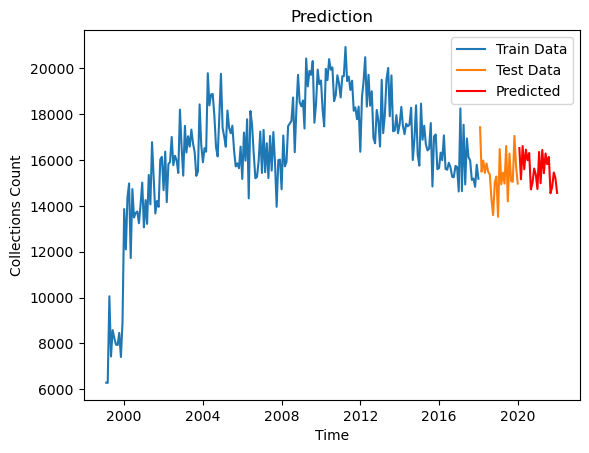

Mean Absolute Error (MAE): 617.119378000398
Mean Squared Error (MSE): 589177.6120455421
Root Mean Squared Error (RMSE): 767.5790591499629
Mean Absolute Percentage Error (MAPE): 4.07%


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df['data_saida'] = pd.to_datetime(df['data_saida'])

df_monthly = df.set_index('data_saida').resample('M').count()
df_monthly['Consumptions_next_month'] = df_monthly['componente']

Consumptions_data = df_monthly['Consumptions_next_month']

train_data = Consumptions_data.iloc[:-24]
test_data = Consumptions_data.iloc[-24:]

model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

predictions = model_fit.forecast(steps=24)

last_month_timestamp = Consumptions_data.index[-1]
next_month_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, 25)]

print("Predicted Consumptions for the next 24 Months:")
for i in range(24):
    print(f"{next_month_timestamps[i]}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_month_timestamps, predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Consumptions Count')
plt.title('Prediction')
plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


# Moving Average (1 month)

Predicted Consumptions for the month starting on: 2020-01-31 00:00:00
Predicted Consumptions for Next Month: 15719


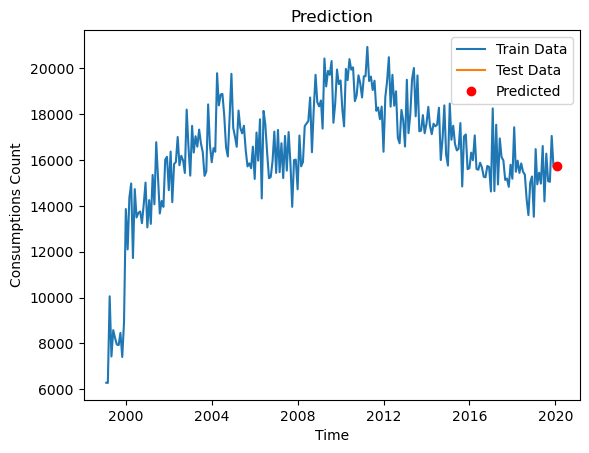

Mean Absolute Error (MAE): 750.0
Mean Squared Error (MSE): 562500.0
Root Mean Squared Error (RMSE): 750.0
Mean Absolute Percentage Error (MAPE): 5.01%


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

df['data_saida'] = pd.to_datetime(df['data_saida'])

df_monthly = df.set_index('data_saida').resample('M').count()
df_monthly['Consumptions_next_month'] = df_monthly['componente']

Consumptions_data = df_monthly['Consumptions_next_month']

train_data = Consumptions_data.iloc[:-1]
test_data = Consumptions_data.iloc[-1:]

moving_average_order = 1

moving_avg_predictions = train_data.rolling(window=moving_average_order).mean()

last_available_avg = moving_avg_predictions.iloc[-1]
predictions = [last_available_avg]

last_month_timestamp = Consumptions_data.index[-1]
next_month_timestamp = last_month_timestamp + pd.DateOffset(months=1)

print(f"Predicted Consumptions for the month starting on: {next_month_timestamp}")
print(f"Predicted Consumptions for Next Month: {int(np.round(predictions[0]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_month_timestamp, predictions[0], 'ro', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Consumptions Count')
plt.title('Prediction')
plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


# Moving Average (3 months)

Predicted Consumptions for the next 3 Months:
2020-01-31 00:00:00: 15465
2020-02-29 00:00:00: 15465
2020-03-31 00:00:00: 15465


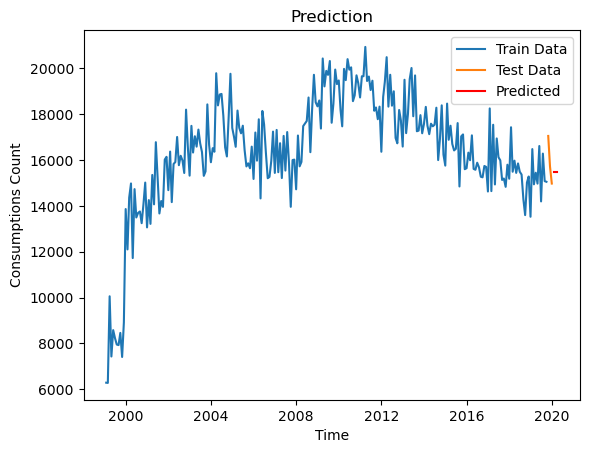

Mean Absolute Error (MAE): 776.5555555555553
Mean Squared Error (MSE): 935346.7777777772
Root Mean Squared Error (RMSE): 967.1332781875398
Mean Absolute Percentage Error (MAPE): 4.73%


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df['data_saida'] = pd.to_datetime(df['data_saida'])

df_monthly = df.set_index('data_saida').resample('M').count()
df_monthly['Consumptions_next_month'] = df_monthly['componente']

Consumptions_data = df_monthly['Consumptions_next_month']

train_data = Consumptions_data.iloc[:-3]
test_data = Consumptions_data.iloc[-3:]

moving_average_order = 3

moving_avg_predictions = train_data.rolling(window=moving_average_order).mean()

last_available_avg = moving_avg_predictions.iloc[-1]
predictions = [last_available_avg] * 3

last_month_timestamp = Consumptions_data.index[-1]
next_month_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, 4)]

print("Predicted Consumptions for the next 3 Months:")
for i in range(3):
    print(f"{next_month_timestamps[i]}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_month_timestamps, predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Consumptions Count')
plt.title('Prediction')
plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


# Moving Average (6 months)

Predicted Collections for the next 6 Months:
2020-01-31 00:00:00: 15436
2020-02-29 00:00:00: 15436
2020-03-31 00:00:00: 15436
2020-04-30 00:00:00: 15436
2020-05-31 00:00:00: 15436
2020-06-30 00:00:00: 15436


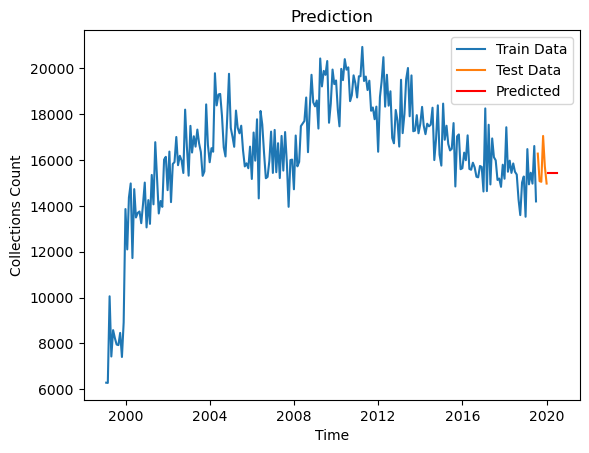

Mean Absolute Error (MAE): 658.1666666666666
Mean Squared Error (MSE): 645809.9166666666
Root Mean Squared Error (RMSE): 803.6229941127037
Mean Absolute Percentage Error (MAPE): 4.08%


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df['data_saida'] = pd.to_datetime(df['data_saida'])

df_monthly = df.set_index('data_saida').resample('M').count()
df_monthly['Consumptions_next_month'] = df_monthly['componente']

Consumptions_data = df_monthly['Consumptions_next_month']

train_data = Consumptions_data.iloc[:-6]
test_data = Consumptions_data.iloc[-6:]

moving_average_order = 6

moving_avg_predictions = train_data.rolling(window=moving_average_order).mean()

last_available_avg = moving_avg_predictions.iloc[-1]
predictions = [last_available_avg] * 6

last_month_timestamp = Consumptions_data.index[-1]
next_month_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, 7)]

print("Predicted Consumptions for the next 6 Months:")
for i in range(6):
    print(f"{next_month_timestamps[i]}: {int(np.round(predictions[i]))}")

# Plot the data
plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_month_timestamps, predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Consumptions Count')
plt.title('Prediction')
plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


# Moving Average (1 year)

Predicted Collections for the next 12 Months:
2020-01-31 00:00:00: 15224
2020-02-29 00:00:00: 15224
2020-03-31 00:00:00: 15224
2020-04-30 00:00:00: 15224
2020-05-31 00:00:00: 15224
2020-06-30 00:00:00: 15224
2020-07-31 00:00:00: 15224
2020-08-31 00:00:00: 15224
2020-09-30 00:00:00: 15224
2020-10-31 00:00:00: 15224
2020-11-30 00:00:00: 15224
2020-12-31 00:00:00: 15224


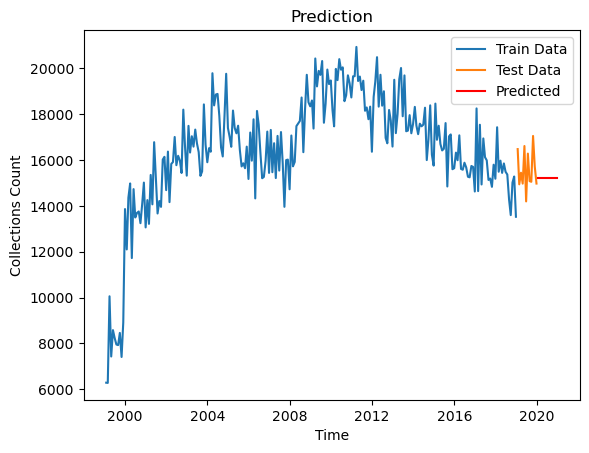

Mean Absolute Error (MAE): 697.8333333333334
Mean Squared Error (MSE): 792870.368055555
Root Mean Squared Error (RMSE): 890.4326858643246
Mean Absolute Percentage Error (MAPE): 4.37%


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df['data_saida'] = pd.to_datetime(df['data_saida'])

df_monthly = df.set_index('data_saida').resample('M').count()
df_monthly['Consumptions_next_month'] = df_monthly['componente']

Consumptions_data = df_monthly['Consumptions_next_month']

train_data = Consumptions_data.iloc[:-12]
test_data = Consumptions_data.iloc[-12:]

moving_average_order = 12

moving_avg_predictions = train_data.rolling(window=moving_average_order).mean()

last_available_avg = moving_avg_predictions.iloc[-1]
predictions = [last_available_avg] * 12

last_month_timestamp = Consumptions_data.index[-1]
next_month_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, 13)]

print("Predicted Consumptions for the next 12 Months:")
for i in range(12):
    print(f"{next_month_timestamps[i]}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_month_timestamps, predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Consumptions Count')
plt.title('Prediction')
plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


# ARIMA (1 month)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  251
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2128.285
Date:                Tue, 21 Nov 2023   AIC                           4262.570
Time:                        12:19:31   BIC                           4273.134
Sample:                    01-31-1999   HQIC                          4266.822
                         - 11-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2115      0.088     -2.391      0.017      -0.385      -0.038
ma.L1         -0.4798      0.069     -6.978      0.000      -0.615      -0.345
sigma2      1.382e+06   8.93e+04     15.482      0.0

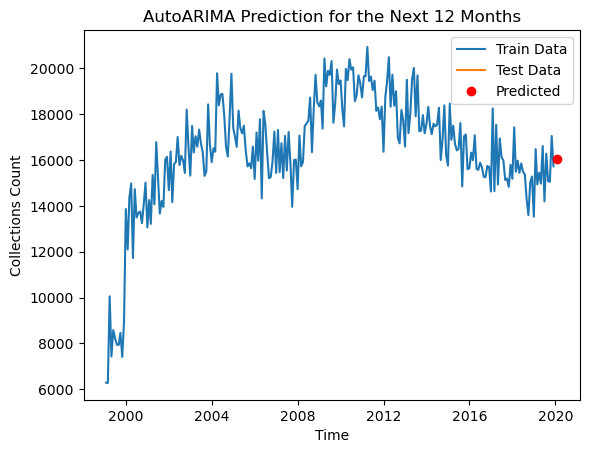

Mean Absolute Error (MAE): 1053.6024365102148
Mean Squared Error (MSE): 1110078.0942202613
Root Mean Squared Error (RMSE): 1053.6024365102148
Mean Absolute Percentage Error (MAPE): 7.04%


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

df['data_saida'] = pd.to_datetime(df['data_saida'])

df_monthly = df.set_index('data_saida').resample('M').count()
df_monthly['Consumptions_next_month'] = df_monthly['componente']

Consumptions_data = df_monthly['Consumptions_next_month']
train_data = Consumptions_data.iloc[:-1]
test_data = Consumptions_data.iloc[-1:]

stepwise_fit = auto_arima(train_data, start_p=0, start_q=0, max_p=3, max_q=3, m=1, seasonal=False, suppress_warnings=True)

print(stepwise_fit.summary())

forecast_steps = 1
predictions = stepwise_fit.predict(n_periods=forecast_steps)

last_month_timestamp = Consumptions_data.index[-1]
next_months_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, forecast_steps + 1)]

print("Predicted Consumptions for the next 1 month:")
for i, timestamp in enumerate(next_months_timestamps):
    print(f"{timestamp}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_months_timestamps, predictions, 'ro', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Consumptions Count')
plt.title('AutoARIMA Prediction for the Next 1 Month')

plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


# ARIMA (3 months)

c:\Users\gonca\anaconda3\envs\IST_DL21_Env\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (3) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  249
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2111.163
Date:                Tue, 21 Nov 2023   AIC                           4228.326
Time:                        12:21:55   BIC                           4238.866
Sample:                    01-31-1999   HQIC                          4232.569
                         - 09-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2121      0.088     -2.397      0.017      -0.385      -0.039
ma.L1         -0.4770      0.069     -6.905      0.000      -0.612      -0.342
sigma2       1.38e+06   8.91e+04     15.483      0.0

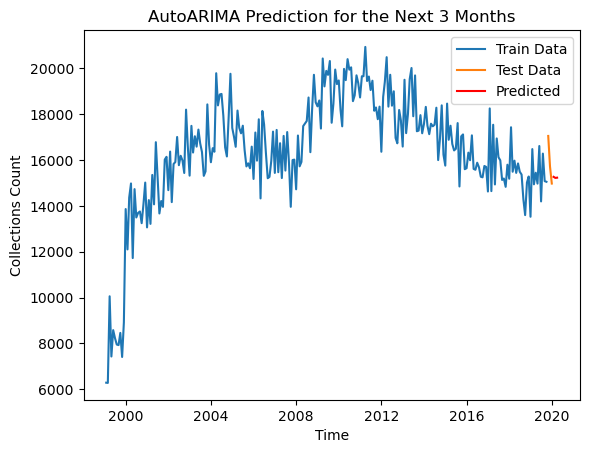

Mean Absolute Error (MAE): 847.7149154175646
Mean Squared Error (MSE): 1166578.64367737
Root Mean Squared Error (RMSE): 1080.0827022396802
Mean Absolute Percentage Error (MAPE): 5.13%


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

df['data_saida'] = pd.to_datetime(df['data_saida'])

df_monthly = df.set_index('data_saida').resample('M').count()
df_monthly['Consumptions_next_3_month'] = df_monthly['componente']

Consumptions_data = df_monthly['Consumptions_next_3_month']
train_data = Consumptions_data.iloc[:-3]
test_data = Consumptions_data.iloc[-3:]

stepwise_fit = auto_arima(train_data, start_p=0, start_q=0, max_p=3, max_q=3, m=3, seasonal=False, suppress_warnings=True)

print(stepwise_fit.summary())

forecast_steps = 3
predictions = stepwise_fit.predict(n_periods=forecast_steps)

last_month_timestamp = Consumptions_data.index[-1]
next_months_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, forecast_steps + 1)]

print("Predicted Consumptions for the next 3 months:")
for i, timestamp in enumerate(next_months_timestamps):
    print(f"{timestamp}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_months_timestamps, predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Consumptions Count')
plt.title('AutoARIMA Prediction for the Next 3 Months')

plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# ARIMA (6 months)

c:\Users\gonca\anaconda3\envs\IST_DL21_Env\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (6) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  246
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2086.752
Date:                Tue, 21 Nov 2023   AIC                           4179.503
Time:                        12:29:56   BIC                           4190.007
Sample:                    01-31-1999   HQIC                          4183.733
                         - 06-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2036      0.090     -2.266      0.023      -0.380      -0.028
ma.L1         -0.4814      0.070     -6.893      0.000      -0.618      -0.345
sigma2      1.392e+06   9.09e+04     15.327      0.0

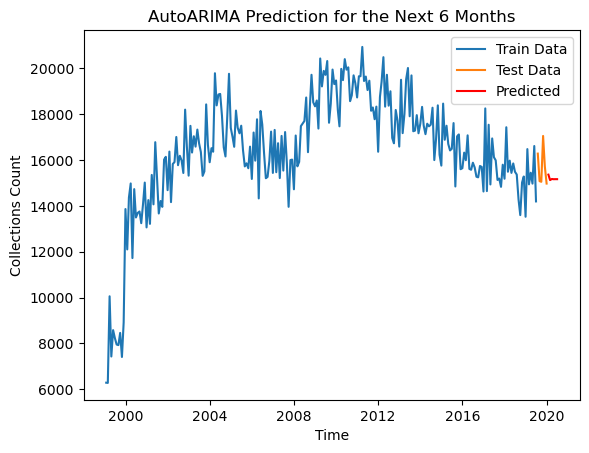

Mean Absolute Error (MAE): 620.1354493747449
Mean Squared Error (MSE): 793844.5675850698
Root Mean Squared Error (RMSE): 890.9795550881455
Mean Absolute Percentage Error (MAPE): 3.77%


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

df['data_saida'] = pd.to_datetime(df['data_saida'])

df_monthly = df.set_index('data_saida').resample('M').count()
df_monthly['Consumptions_next_6_month'] = df_monthly['componente']

Consumptions_data = df_monthly['Consumptions_next_6_month']
train_data = Consumptions_data.iloc[:-6]
test_data = Consumptions_data.iloc[-6:]

stepwise_fit = auto_arima(train_data, start_p=0, start_q=0, max_p=3, max_q=3, m=6, seasonal=False, suppress_warnings=True)

print(stepwise_fit.summary())

forecast_steps = 6
predictions = stepwise_fit.predict(n_periods=forecast_steps)

last_month_timestamp = Consumptions_data.index[-1]
next_months_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, forecast_steps + 1)]

print("Predicted Consumptions for the next 6 months:")
for i, timestamp in enumerate(next_months_timestamps):
    print(f"{timestamp}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_months_timestamps, predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Consumptions Count')
plt.title('AutoARIMA Prediction for the Next 6 Months')

plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# ARIMA (1 year)

c:\Users\gonca\anaconda3\envs\IST_DL21_Env\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  240
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2035.913
Date:                Tue, 21 Nov 2023   AIC                           4077.826
Time:                        12:31:21   BIC                           4088.255
Sample:                    01-31-1999   HQIC                          4082.029
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1842      0.092     -2.001      0.045      -0.365      -0.004
ma.L1         -0.4862      0.071     -6.826      0.000      -0.626      -0.347
sigma2      1.396e+06   9.18e+04     15.198      0.0

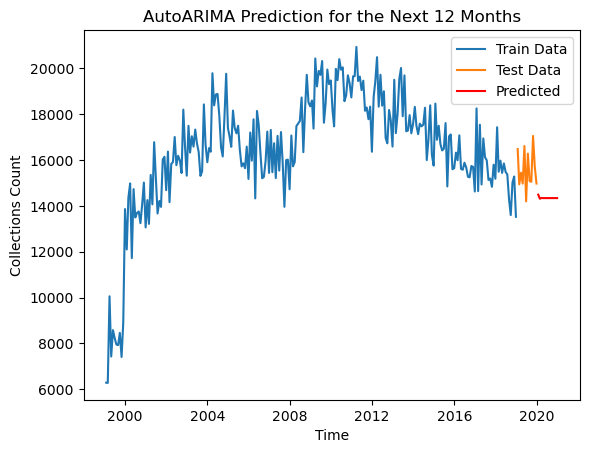

Mean Absolute Error (MAE): 1239.5786765287369
Mean Squared Error (MSE): 2132274.0275244312
Root Mean Squared Error (RMSE): 1460.2308130992276
Mean Absolute Percentage Error (MAPE): 7.73%


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

df['data_saida'] = pd.to_datetime(df['data_saida'])

df_monthly = df.set_index('data_saida').resample('M').count()
df_monthly['Consumptions_next_12_month'] = df_monthly['componente']

Consumptions_data = df_monthly['Consumptions_next_12_month']
train_data = Consumptions_data.iloc[:-12]
test_data = Consumptions_data.iloc[-12:]

stepwise_fit = auto_arima(train_data, start_p=0, start_q=0, max_p=3, max_q=3, m=12, seasonal=False, suppress_warnings=True)

print(stepwise_fit.summary())

forecast_steps = 12
predictions = stepwise_fit.predict(n_periods=forecast_steps)

last_month_timestamp = Consumptions_data.index[-1]
next_months_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, forecast_steps + 1)]

print("Predicted Consumptions for the next 12 months:")
for i, timestamp in enumerate(next_months_timestamps):
    print(f"{timestamp}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_months_timestamps, predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Consumptions Count')
plt.title('AutoARIMA Prediction for the Next 12 Months')

plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# ARIMA (2 years)

c:\Users\gonca\anaconda3\envs\IST_DL21_Env\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (24) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  228
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1935.807
Date:                Tue, 21 Nov 2023   AIC                           3877.614
Time:                        12:48:40   BIC                           3887.888
Sample:                    01-31-1999   HQIC                          3881.760
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1872      0.094     -1.989      0.047      -0.372      -0.003
ma.L1         -0.4811      0.073     -6.572      0.000      -0.625      -0.338
sigma2      1.419e+06   9.55e+04     14.867      0.0

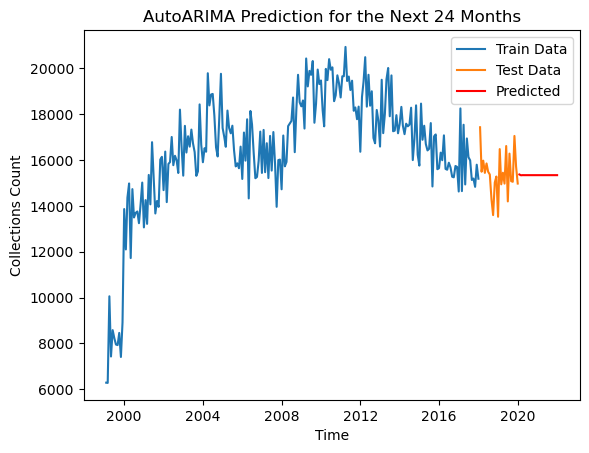

Mean Absolute Error (MAE): 708.1425416203998
Mean Squared Error (MSE): 885867.5479973307
Root Mean Squared Error (RMSE): 941.2053697240208
Mean Absolute Percentage Error (MAPE): 4.61%


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

df['data_saida'] = pd.to_datetime(df['data_saida'])

df_monthly = df.set_index('data_saida').resample('M').count()
df_monthly['Consumptions_next_24_month'] = df_monthly['componente']

Consumptions_data = df_monthly['Consumptions_next_24_month']
train_data = Consumptions_data.iloc[:-24]
test_data = Consumptions_data.iloc[-24:]

stepwise_fit = auto_arima(train_data, start_p=0, start_q=0, max_p=3, max_q=3, m=24, seasonal=False, suppress_warnings=True)

print(stepwise_fit.summary())

forecast_steps = 24
predictions = stepwise_fit.predict(n_periods=forecast_steps)

last_month_timestamp = Consumptions_data.index[-1]
next_months_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, forecast_steps + 1)]

print("Predicted Consumptions for the next 24 months:")
for i, timestamp in enumerate(next_months_timestamps):
    print(f"{timestamp}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_months_timestamps, predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Consumptions Count')
plt.title('AutoARIMA Prediction for the Next 24 Months')

plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# SARIMA (1 month)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  251
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2128.285
Date:                Tue, 21 Nov 2023   AIC                           4262.570
Time:                        12:49:42   BIC                           4273.134
Sample:                    01-31-1999   HQIC                          4266.822
                         - 11-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2115      0.088     -2.391      0.017      -0.385      -0.038
ma.L1         -0.4798      0.069     -6.978      0.000      -0.615      -0.345
sigma2      1.382e+06   8.93e+04     15.482      0.0

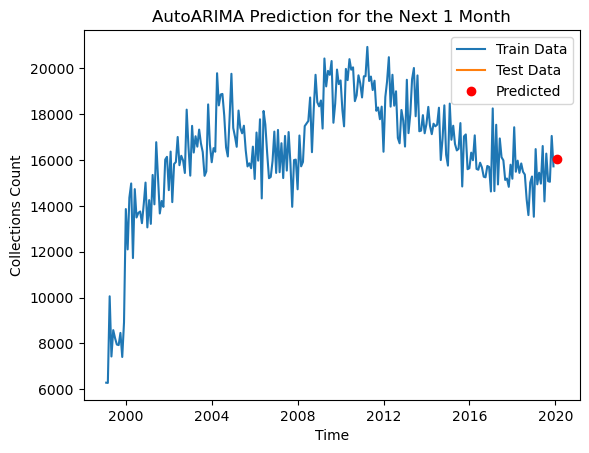

Mean Absolute Error (MAE): 1053.6024365102148
Mean Squared Error (MSE): 1110078.0942202613
Root Mean Squared Error (RMSE): 1053.6024365102148
Mean Absolute Percentage Error (MAPE): 7.04%


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

df['data_saida'] = pd.to_datetime(df['data_saida'])

df_monthly = df.set_index('data_saida').resample('M').count()
df_monthly['Consumptions_next_month'] = df_monthly['componente']

Consumptions_data = df_monthly['Consumptions_next_month']
train_data = Consumptions_data.iloc[:-1]
test_data = Consumptions_data.iloc[-1:]

stepwise_fit = auto_arima(train_data, start_p=0, start_q=0, max_p=3, max_q=3, m=1, seasonal=True, suppress_warnings=True)

print(stepwise_fit.summary())

forecast_steps = 1
predictions = stepwise_fit.predict(n_periods=forecast_steps)

last_month_timestamp = Consumptions_data.index[-1]
next_months_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, forecast_steps + 1)]

print("Predicted Consumptions for the next 1 month:")
for i, timestamp in enumerate(next_months_timestamps):
    print(f"{timestamp}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_months_timestamps, predictions, 'ro', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Consumptions Count')
plt.title('AutoARIMA Prediction for the Next 1 Month')

plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


# SARIMA (3 months)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  249
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2111.163
Date:                Tue, 21 Nov 2023   AIC                           4228.326
Time:                        12:52:49   BIC                           4238.866
Sample:                    01-31-1999   HQIC                          4232.569
                         - 09-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2121      0.088     -2.397      0.017      -0.385      -0.039
ma.L1         -0.4770      0.069     -6.905      0.000      -0.612      -0.342
sigma2       1.38e+06   8.91e+04     15.483      0.0

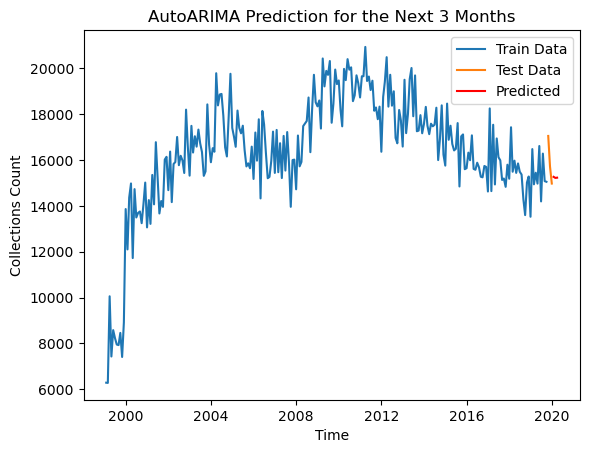

Mean Absolute Error (MAE): 847.7149154175646
Mean Squared Error (MSE): 1166578.64367737
Root Mean Squared Error (RMSE): 1080.0827022396802
Mean Absolute Percentage Error (MAPE): 5.13%


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

df['data_saida'] = pd.to_datetime(df['data_saida'])

df_monthly = df.set_index('data_saida').resample('M').count()
df_monthly['Consumptions_next_3_month'] = df_monthly['componente']

Consumptions_data = df_monthly['Consumptions_next_3_month']
train_data = Consumptions_data.iloc[:-3]
test_data = Consumptions_data.iloc[-3:]

stepwise_fit = auto_arima(train_data, start_p=0, start_q=0, max_p=3, max_q=3, m=3, seasonal=True, suppress_warnings=True)

print(stepwise_fit.summary())

forecast_steps = 3
predictions = stepwise_fit.predict(n_periods=forecast_steps)

last_month_timestamp = Consumptions_data.index[-1]
next_months_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, forecast_steps + 1)]

print("Predicted Consumptions for the next 3 months:")
for i, timestamp in enumerate(next_months_timestamps):
    print(f"{timestamp}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_months_timestamps, predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Consumptions Count')
plt.title('AutoARIMA Prediction for the Next 3 Months')

plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# SARIMA (6 months)

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  246
Model:             SARIMAX(0, 1, 1)x(2, 0, 1, 6)   Log Likelihood               -2051.803
Date:                           Tue, 21 Nov 2023   AIC                           4113.605
Time:                                   12:52:29   BIC                           4131.111
Sample:                               01-31-1999   HQIC                          4120.655
                                    - 06-30-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6138      0.047    -12.948      0.000      -0.707      -0.521
ar.S.L6       -0.5204      0.074     -7.049

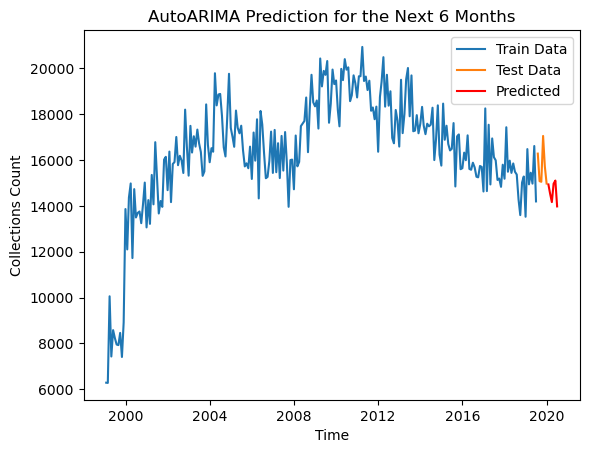

Mean Absolute Error (MAE): 1077.472151203604
Mean Squared Error (MSE): 1431554.805008675
Root Mean Squared Error (RMSE): 1196.475994330298
Mean Absolute Percentage Error (MAPE): 6.75%


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

df['data_saida'] = pd.to_datetime(df['data_saida'])

df_monthly = df.set_index('data_saida').resample('M').count()
df_monthly['Consumptions_next_6_month'] = df_monthly['componente']

Consumptions_data = df_monthly['Consumptions_next_6_month']
train_data = Consumptions_data.iloc[:-6]
test_data = Consumptions_data.iloc[-6:]

stepwise_fit = auto_arima(train_data, start_p=0, start_q=0, max_p=3, max_q=3, m=6, seasonal=True, suppress_warnings=True)

print(stepwise_fit.summary())

forecast_steps = 6
predictions = stepwise_fit.predict(n_periods=forecast_steps)

last_month_timestamp = Consumptions_data.index[-1]
next_months_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, forecast_steps + 1)]

print("Predicted Consumptions for the next 6 months:")
for i, timestamp in enumerate(next_months_timestamps):
    print(f"{timestamp}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_months_timestamps, predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Consumptions Count')
plt.title('AutoARIMA Prediction for the Next 6 Months')

plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# SARIMA (1 year)

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  240
Model:             SARIMAX(2, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -1999.370
Date:                                 Tue, 21 Nov 2023   AIC                           4012.740
Time:                                         12:54:29   BIC                           4037.075
Sample:                                     01-31-1999   HQIC                          4022.546
                                          - 12-31-2018                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.0540     11.231      0.361      0.718     -17.959      26

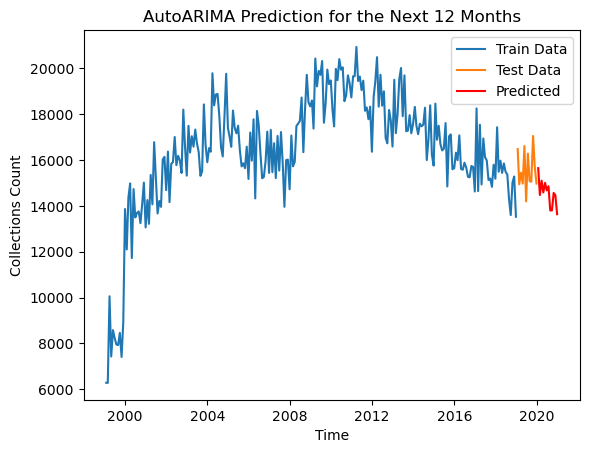

Mean Absolute Error (MAE): 1095.0412863256036
Mean Squared Error (MSE): 1561422.28287787
Root Mean Squared Error (RMSE): 1249.5688387911528
Mean Absolute Percentage Error (MAPE): 6.92%


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

df['data_saida'] = pd.to_datetime(df['data_saida'])

df_monthly = df.set_index('data_saida').resample('M').count()
df_monthly['Consumptions_next_12_month'] = df_monthly['componente']

Consumptions_data = df_monthly['Consumptions_next_12_month']
train_data = Consumptions_data.iloc[:-12]
test_data = Consumptions_data.iloc[-12:]

stepwise_fit = auto_arima(train_data, start_p=0, start_q=0, max_p=3, max_q=3, m=12, seasonal=True, suppress_warnings=True)

print(stepwise_fit.summary())

forecast_steps = 12
predictions = stepwise_fit.predict(n_periods=forecast_steps)

last_month_timestamp = Consumptions_data.index[-1]
next_months_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, forecast_steps + 1)]

print("Predicted Consumptions for the next 12 months:")
for i, timestamp in enumerate(next_months_timestamps):
    print(f"{timestamp}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_months_timestamps, predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Consumptions Count')
plt.title('AutoARIMA Prediction for the Next 12 Months')

plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# SARIMA (2 years)

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  228
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 24)   Log Likelihood               -1912.668
Date:                            Tue, 21 Nov 2023   AIC                           3833.335
Time:                                    14:38:07   BIC                           3847.035
Sample:                                01-31-1999   HQIC                          3838.863
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5814      0.046    -12.728      0.000      -0.671      -0.492
ar.S.L24       0.9445      0.053   

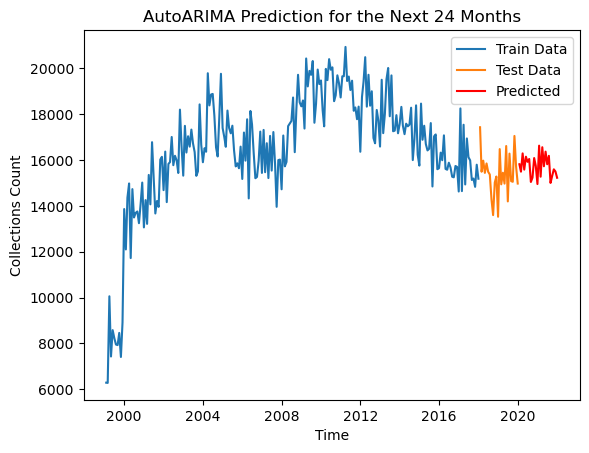

Mean Absolute Error (MAE): 641.7508305873067
Mean Squared Error (MSE): 709265.2435167251
Root Mean Squared Error (RMSE): 842.1788667003733
Mean Absolute Percentage Error (MAPE): 4.25%


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

df['data_saida'] = pd.to_datetime(df['data_saida'])

df_monthly = df.set_index('data_saida').resample('M').count()
df_monthly['Consumptions_next_24_month'] = df_monthly['componente']

Consumptions_data = df_monthly['Consumptions_next_24_month']
train_data = Consumptions_data.iloc[:-24]
test_data = Consumptions_data.iloc[-24:]

stepwise_fit = auto_arima(train_data, start_p=0, start_q=0, max_p=3, max_q=3, m=24, seasonal=True, suppress_warnings=True)

print(stepwise_fit.summary())

forecast_steps = 24
predictions = stepwise_fit.predict(n_periods=forecast_steps)

last_month_timestamp = Consumptions_data.index[-1]
next_months_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, forecast_steps + 1)]

print("Predicted Consumptions for the next 24 months:")
for i, timestamp in enumerate(next_months_timestamps):
    print(f"{timestamp}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_months_timestamps, predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Consumptions Count')
plt.title('AutoARIMA Prediction for the Next 24 Months')

plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")